# Tutorial for gwaslab 4.0.0

- In this tutorial, we provide a brief overview of the core functions in GWASLab for summary statistics quality control (QC), standardization, and harmonization.
- We also demonstrate visualization features, including Manhattan plots, Q–Q plots, and regional plots.
- The Jupyter notebook for this tutorial can be downloaded from https://github.com/Cloufield/gwaslab/blob/main/docs/tutorial_v4.ipynb
- Please note that the sample data and reference files are available on GitHub, while the full processed reference datasets are currently hosted on Dropbox.


## Download sample data


- Using a Jupyter notebook, we first download a sample dataset.
- The sample dataset we will use as an example (File size: ~40M):
  1. Sample sumstats `bbj_t2d_hm3_chr7_variants.txt.gz`: processed sumstats (only HapMap3 variants and chr7 region) of type 2 diabetes from BBJ (K. Suzuki et al., Nature Genetics. 51, 379–386 (2019).)
  2. SNPID-rsID conversion table (sample) `1kg_dbsnp151_hg19_auto_hm3_chr7_variants.txt.gz`
  3. dbSNP VCF (sample) `b157_2564.vcf.gz`
  4. 1KG EAS reference VCF (only chr7:126253550-128253550) `1kg_eas_hg19.chr7_126253550_128253550.vcf.gz`
    

In [1]:
#!git clone https://github.com/Cloufield/gwaslab-sample-data.git

In [2]:
!ls  gwaslab-sample-data 

1kg_dbsnp151_hg19_auto_hm3_chr7_variants.txt.gz
1kg_eas_hg19.chr7_126253550_128253550.vcf.gz
1kg_eas_hg19.chr7_126253550_128253550.vcf.gz.tbi
LICENSE
README.md
b157_2564.vcf.gz
b157_2564.vcf.gz.tbi
bbj_t2d_hm3_chr7_variants.txt.gz
chr7.fasta.gz
eas_ldscores


## Import gwaslab package

📖 **Documentation**: [Import gwaslab package](https://cloufield.github.io/gwaslab/)


GWASLab can be installed using pip: 

In [3]:
# !pip install gwaslab==4.0.0

If you installed gwaslab from pip, simply run the command to import the package:

In [4]:
import gwaslab as gl

Alternatively, if you want to use the latest development version from GitHub, you can clone the repository and import the package by inserting your package path into the system path:

In [5]:
#!git clone https://github.com/Cloufield/gwaslab.git

import sys
sys.path.insert(0,"/home/yunye/work/gwaslab/src")
import gwaslab as gl

## Loading data into gwaslab Sumstats

📖 **Documentation**: [Loading data into gwaslab Sumstats](https://cloufield.github.io/gwaslab/SumstatsObject/)


Let's import the raw sumstats into the `gwaslab.Sumstats` object by specifying the necessary columns.

In [6]:
mysumstats = gl.Sumstats("gwaslab-sample-data/bbj_t2d_hm3_chr7_variants.txt.gz",
             snpid="SNPID",
             chrom="CHR",
             pos="POS",
             ea="EA",
             nea="NEA",
             neaf="EAF",
             beta="BETA",
             se="SE",
             p="P",
             n="N",
             sep="\t")

2025/12/25 20:50:19 GWASLab v4.0.0 https://cloufield.github.io/gwaslab/
2025/12/25 20:50:19 (C) 2022-2025, Yunye He, Kamatani Lab, GPL-3.0 license, gwaslab@gmail.com
2025/12/25 20:50:19 Python version: 3.12.0 | packaged by conda-forge | (main, Oct  3 2023, 08:43:22) [GCC 12.3.0]
2025/12/25 20:50:19 Start to initialize gl.Sumstats from file :gwaslab-sample-data/bbj_t2d_hm3_chr7_variants.txt.gz
2025/12/25 20:50:21  -Reading columns          : CHR,POS,SNPID,BETA,P,NEA,SE,N,EAF,EA
2025/12/25 20:50:21  -Renaming columns to      : CHR,POS,SNPID,BETA,P,NEA,SE,N,EAF,EA
2025/12/25 20:50:21  -Current Dataframe shape : 1103020  x  10
2025/12/25 20:50:21  -Initiating a status column: STATUS ...
2025/12/25 20:50:21 #WARNING! Version of genomic coordinates is unknown...
2025/12/25 20:50:21  -NEAF is specified...
2025/12/25 20:50:21  -Checking if 0<= NEAF <=1 ...
2025/12/25 20:50:21  -Converted NEAF to EAF.
2025/12/25 20:50:21  -Removed 0 variants with bad NEAF.
2025/12/25 20:50:21 Start to reorder t

## Loading by specifying keyword in formatbook

📖 **Documentation**: [Loading by specifying keyword in formatbook](https://cloufield.github.io/gwaslab/SumstatsObject/)


Alternatively, you can specify format keywords listed in the formatbook (https://github.com/Cloufield/formatbook):  

In [7]:
# mysumstats = gl.Sumstats("gwaslab-sample-data/bbj_t2d_hm3_chr7_variants.txt.gz", fmt="gwaslab", verbose=True)

## Sumstats.data

📖 **Documentation**: [Sumstats.data](https://cloufield.github.io/gwaslab/SumstatsObject/)


Sumstats are stored in `Sumstats.data` as a pandas DataFrame. You can check the data like: 

In [8]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,STATUS,EAF,BETA,SE,P,N
0,1:752566_G_A,1,752566,G,A,9999999,0.8422,-0.0155,0.0131,0.2350,166718
1,1:752721_A_G,1,752721,G,A,9999999,0.2507,0.0204,0.0147,0.1650,166718
2,1:754182_A_G,1,754182,G,A,9999999,0.2505,0.0222,0.0166,0.1817,166718
3,1:760912_C_T,1,760912,C,T,9999999,0.8425,-0.0171,0.0148,0.2480,166718
4,1:761147_T_C,1,761147,C,T,9999999,0.1581,0.0171,0.0148,0.2480,166718
...,...,...,...,...,...,...,...,...,...,...,...
1103015,X:154343911_A_G,X,154343911,G,A,9999999,0.8058,0.0019,0.0090,0.8297,191764
1103016,X:154379088_C_A,X,154379088,C,A,9999999,0.7783,0.0027,0.0094,0.7723,191764
1103017,X:154536836_C_T,X,154536836,C,T,9999999,0.2196,-0.0084,0.0085,0.3192,191764
1103018,X:154763036_A_G,X,154763036,G,A,9999999,0.3686,-0.0102,0.0105,0.3302,191764


- For details on the GWASLab Sumstats object, see: https://cloufield.github.io/gwaslab/SumstatsObject/

## Standardization & QC : `.basic_check()`

📖 **Documentation**: [Standardization & QC : `.basic_check()`](https://cloufield.github.io/gwaslab/QC&Filtering/)


It is necessary to check variant ID (SNPID), rsID, chromosome (CHR), base pair position (POS), alleles (EA and NEA), and statistics before any manipulations or analysis. GWASLab provides an all-in-one function for this: `.basic_check()`.

**Note**: Sometimes you need to run this before plotting if the sumstats are not in a standard format.

In [9]:
#check SNPID,rsID,CHR,POS,EA, NEA and statistics
mysumstats.basic_check()

2025/12/25 20:50:21 Start to check SNPID/rsID ...(v4.0.0)
2025/12/25 20:50:21  -Current Dataframe shape : 1103020 x 11 ; Memory usage: 87.32 MB
2025/12/25 20:50:21  -Checking SNPID data type...
2025/12/25 20:50:21  -Converted datatype for SNPID: object -> string
2025/12/25 20:50:21  -Checking NA strings :na,NA,Na,Nan,NaN,<NA>,null,NULL,#N/A,#VALUE!,N/A,n/a,missing,
2025/12/25 20:50:21  -Checking if SNPID contains NA strings...
2025/12/25 20:50:21  -Checking if SNPID is CHR:POS:NEA:EA...(separator: - ,: , _)
2025/12/25 20:50:22 Finished checking SNPID/rsID.
2025/12/25 20:50:22 Start to fix chromosome notation (CHR) ...(v4.0.0)
2025/12/25 20:50:22  -Checking CHR data type...
2025/12/25 20:50:22  -Variants with standardized chromosome notation: 1100517
2025/12/25 20:50:22  -Variants with fixable chromosome notations: 2503
2025/12/25 20:50:22  -No unrecognized chromosome notations...
2025/12/25 20:50:22  -Identifying non-autosomal chromosomes : X, Y, and MT ...
2025/12/25 20:50:22  -Identi

,SNPID,CHR,POS,EA,NEA,STATUS,EAF,BETA,SE,P,N
0,1:752566_G_A,1,752566,G,A,9960099,0.8422,-0.0155,0.0131,0.2350,166718
1,1:752721_A_G,1,752721,G,A,9960099,0.2507,0.0204,0.0147,0.1650,166718
2,1:754182_A_G,1,754182,G,A,9960099,0.2505,0.0222,0.0166,0.1817,166718
3,1:760912_C_T,1,760912,C,T,9960099,0.8425,-0.0171,0.0148,0.2480,166718
4,1:761147_T_C,1,761147,C,T,9960099,0.1581,0.0171,0.0148,0.2480,166718
...,...,...,...,...,...,...,...,...,...,...,...
1103015,X:154343911_A_G,23,154343911,G,A,9960099,0.8058,0.0019,0.0090,0.8297,191764
1103016,X:154379088_C_A,23,154379088,C,A,9960099,0.7783,0.0027,0.0094,0.7723,191764
1103017,X:154536836_C_T,23,154536836,C,T,9960099,0.2196,-0.0084,0.0085,0.3192,191764
1103018,X:154763036_A_G,23,154763036,G,A,9960099,0.3686,-0.0102,0.0105,0.3302,191764


## Infer genome build

📖 **Documentation**: [Infer genome build](https://cloufield.github.io/gwaslab/InferBuild/)


If the genome build is not specified, GWASLab can infer it based on HapMap3 SNPs. For more details, see: https://cloufield.github.io/gwaslab/InferBuild/

In [10]:
mysumstats.infer_build()

2025/12/25 20:50:27  -Genomic coordinates are based on GRCh37/hg19...
2025/12/25 20:50:27 Start to infer genome build version using hapmap3 SNPs ...(v4.0.0)
2025/12/25 20:50:27  -Loading Hapmap3 variants data...
2025/12/25 20:50:31  -CHR and POS will be used for matching...
2025/12/25 20:50:32  -Matching variants for hg19: num_hg19 =  1092430
2025/12/25 20:50:32  -Matching variants for hg38: num_hg38 =  10807
2025/12/25 20:50:32  -Since num_hg19 >> num_hg38, set the genome build to hg19 for the STATUS code....
2025/12/25 20:50:33 Finished inferring genome build version using hapmap3 SNPs.


## Create Manhattan plots and Q-Q plots

📖 **Documentation**: [Create Manhattan plots and Q-Q plots](https://cloufield.github.io/gwaslab/Visualization/)


Next you’ll probably want to check is the Manhattan and Q–Q plots for your summary statistics.
gwaslab performs a minimal QC on the data automatically when generating these plots.

2025/12/25 20:50:33 Configured plot style for plot_mqq:mqq
2025/12/25 20:50:33  -QC is finished according to meta. Quick QC will be skipped.
2025/12/25 20:50:33 Starting Manhattan-QQ plot creation (Version v4.0.0)
2025/12/25 20:50:33  -Genomic coordinates are based on GRCh37/hg19...
2025/12/25 20:50:33  - Genomic coordinates version: 19 ...
2025/12/25 20:50:33  - Genome-wide significance level to plot is set to 5e-08 ...
2025/12/25 20:50:33  - Input sumstats contains 1103020 variants...
2025/12/25 20:50:33  - Manhattan-QQ plot layout mode selected: mqq
2025/12/25 20:50:33  -POS data type is already numeric. Skipping conversion...
2025/12/25 20:50:33  -CHR data type is already numeric. Skipping conversion...
2025/12/25 20:50:33 Finished loading specified columns from the statistics
2025/12/25 20:50:33 Start data conversion and sanity check:
2025/12/25 20:50:33  -Sanity check will be skipped.
2025/12/25 20:50:33  -Sanity check after conversion: 0 variants with P value outside of (0,1] wi

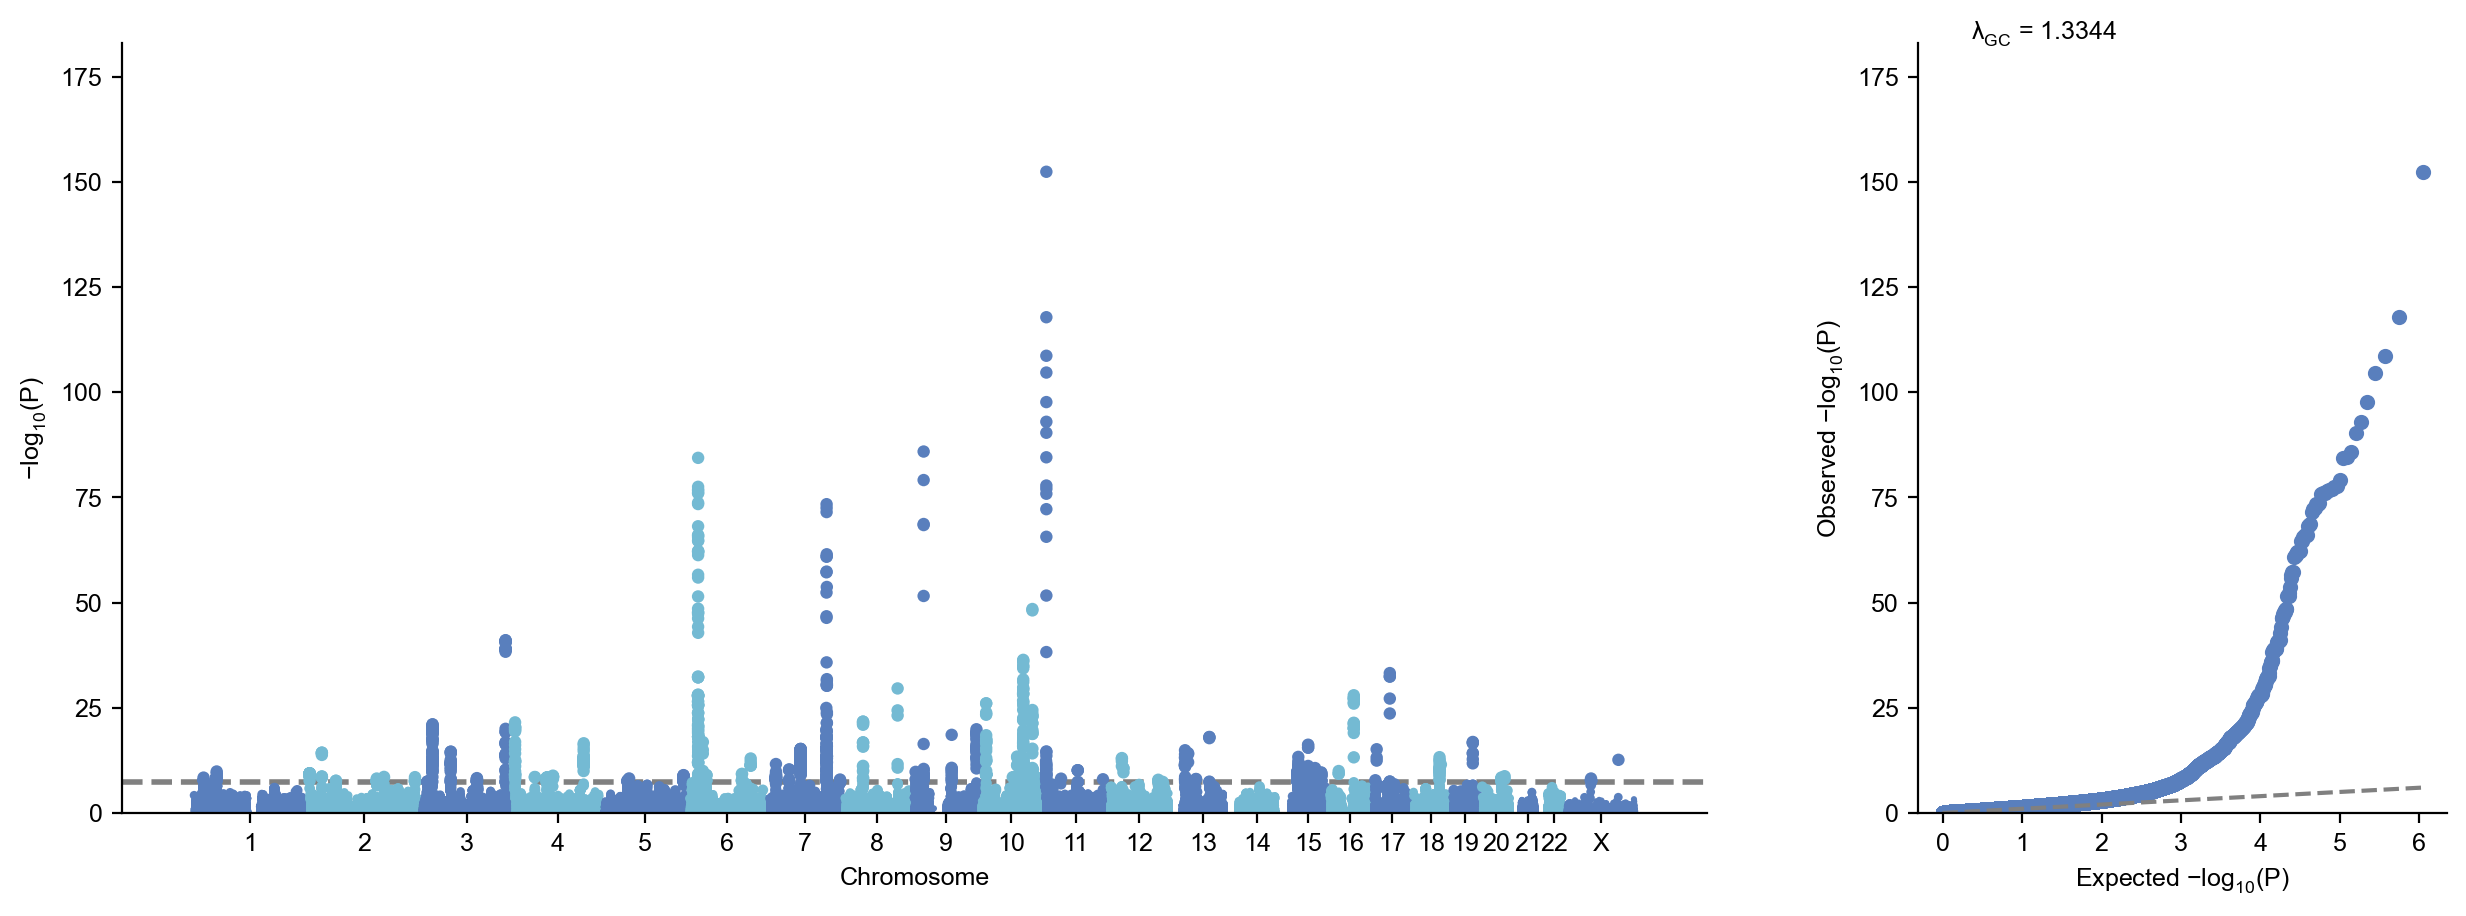

In [11]:
mysumstats.plot_mqq()

Using `.plot_mqq()`, you can easily plot the Manhattan and Q–Q plots. However, plotting all points without any adjustments may not be informative in this case, and it can take a relatively long time. The most significant locus may dwarf other less significant loci. To adjust the plot, GWASLab provides a wide range of customization options. For example, we can use `skip` and `cut`:

- `skip`: skip variants with MLOG10P < `skip` for faster plotting speed
- `cut`: rescale the MLOG10P values when MLOG10P > `cut`  

2025/12/25 20:50:43 Configured plot style for plot_mqq:mqq
2025/12/25 20:50:43  -QC is finished according to meta. Quick QC will be skipped.
2025/12/25 20:50:43 Starting Manhattan-QQ plot creation (Version v4.0.0)
2025/12/25 20:50:43  -Genomic coordinates are based on GRCh37/hg19...
2025/12/25 20:50:43  - Genomic coordinates version: 19 ...
2025/12/25 20:50:43  - Genome-wide significance level to plot is set to 5e-08 ...
2025/12/25 20:50:43  - Input sumstats contains 1103020 variants...
2025/12/25 20:50:43  - Manhattan-QQ plot layout mode selected: mqq
2025/12/25 20:50:43  -POS data type is already numeric. Skipping conversion...
2025/12/25 20:50:43  -CHR data type is already numeric. Skipping conversion...
2025/12/25 20:50:43 Finished loading specified columns from the statistics
2025/12/25 20:50:43 Start data conversion and sanity check:
2025/12/25 20:50:43  -Sanity check will be skipped.
2025/12/25 20:50:43  -Sanity check after conversion: 0 variants with P value outside of (0,1] wi

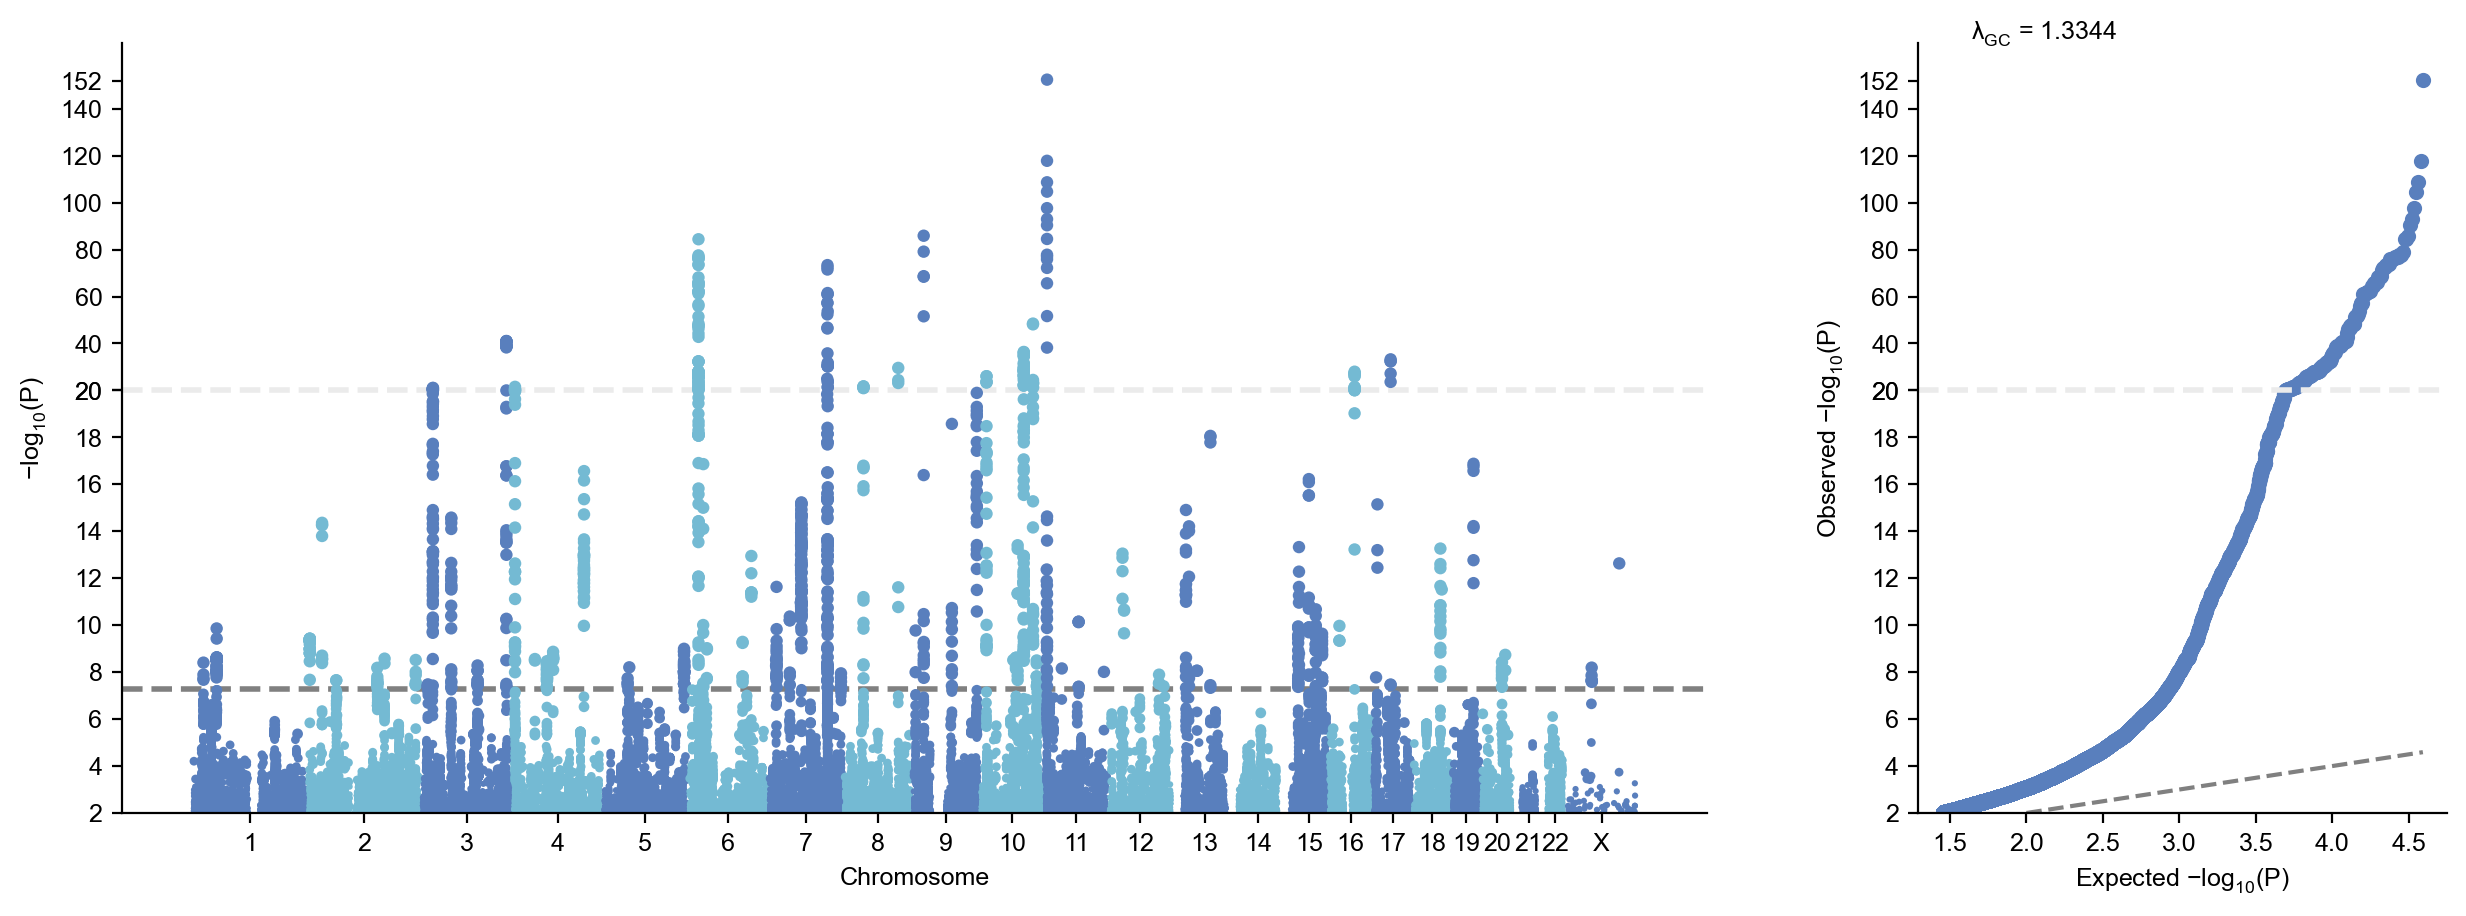

In [12]:
mysumstats.plot_mqq(skip=2, cut=20)

This looks better now. But what if we want to annotate some of the most significant loci (for example, lead variants with MLOG10P > 30) and only plot the Manhattan plot?

2025/12/25 20:50:44 Configured plot style for plot_mqq:m
2025/12/25 20:50:44  -QC is finished according to meta. Quick QC will be skipped.
2025/12/25 20:50:44 Starting Manhattan plot creation (Version v4.0.0)
2025/12/25 20:50:44  -Genomic coordinates are based on GRCh37/hg19...
2025/12/25 20:50:44  - Genomic coordinates version: 19 ...
2025/12/25 20:50:44  - Genome-wide significance level to plot is set to 5e-08 ...
2025/12/25 20:50:44  - Input sumstats contains 1103020 variants...
2025/12/25 20:50:44  - Manhattan plot layout mode selected: m
2025/12/25 20:50:45  -POS data type is already numeric. Skipping conversion...
2025/12/25 20:50:45  -CHR data type is already numeric. Skipping conversion...
2025/12/25 20:50:45 Finished loading specified columns from the statistics
2025/12/25 20:50:45 Start data conversion and sanity check:
2025/12/25 20:50:45  -Sanity check will be skipped.
2025/12/25 20:50:45  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be remo

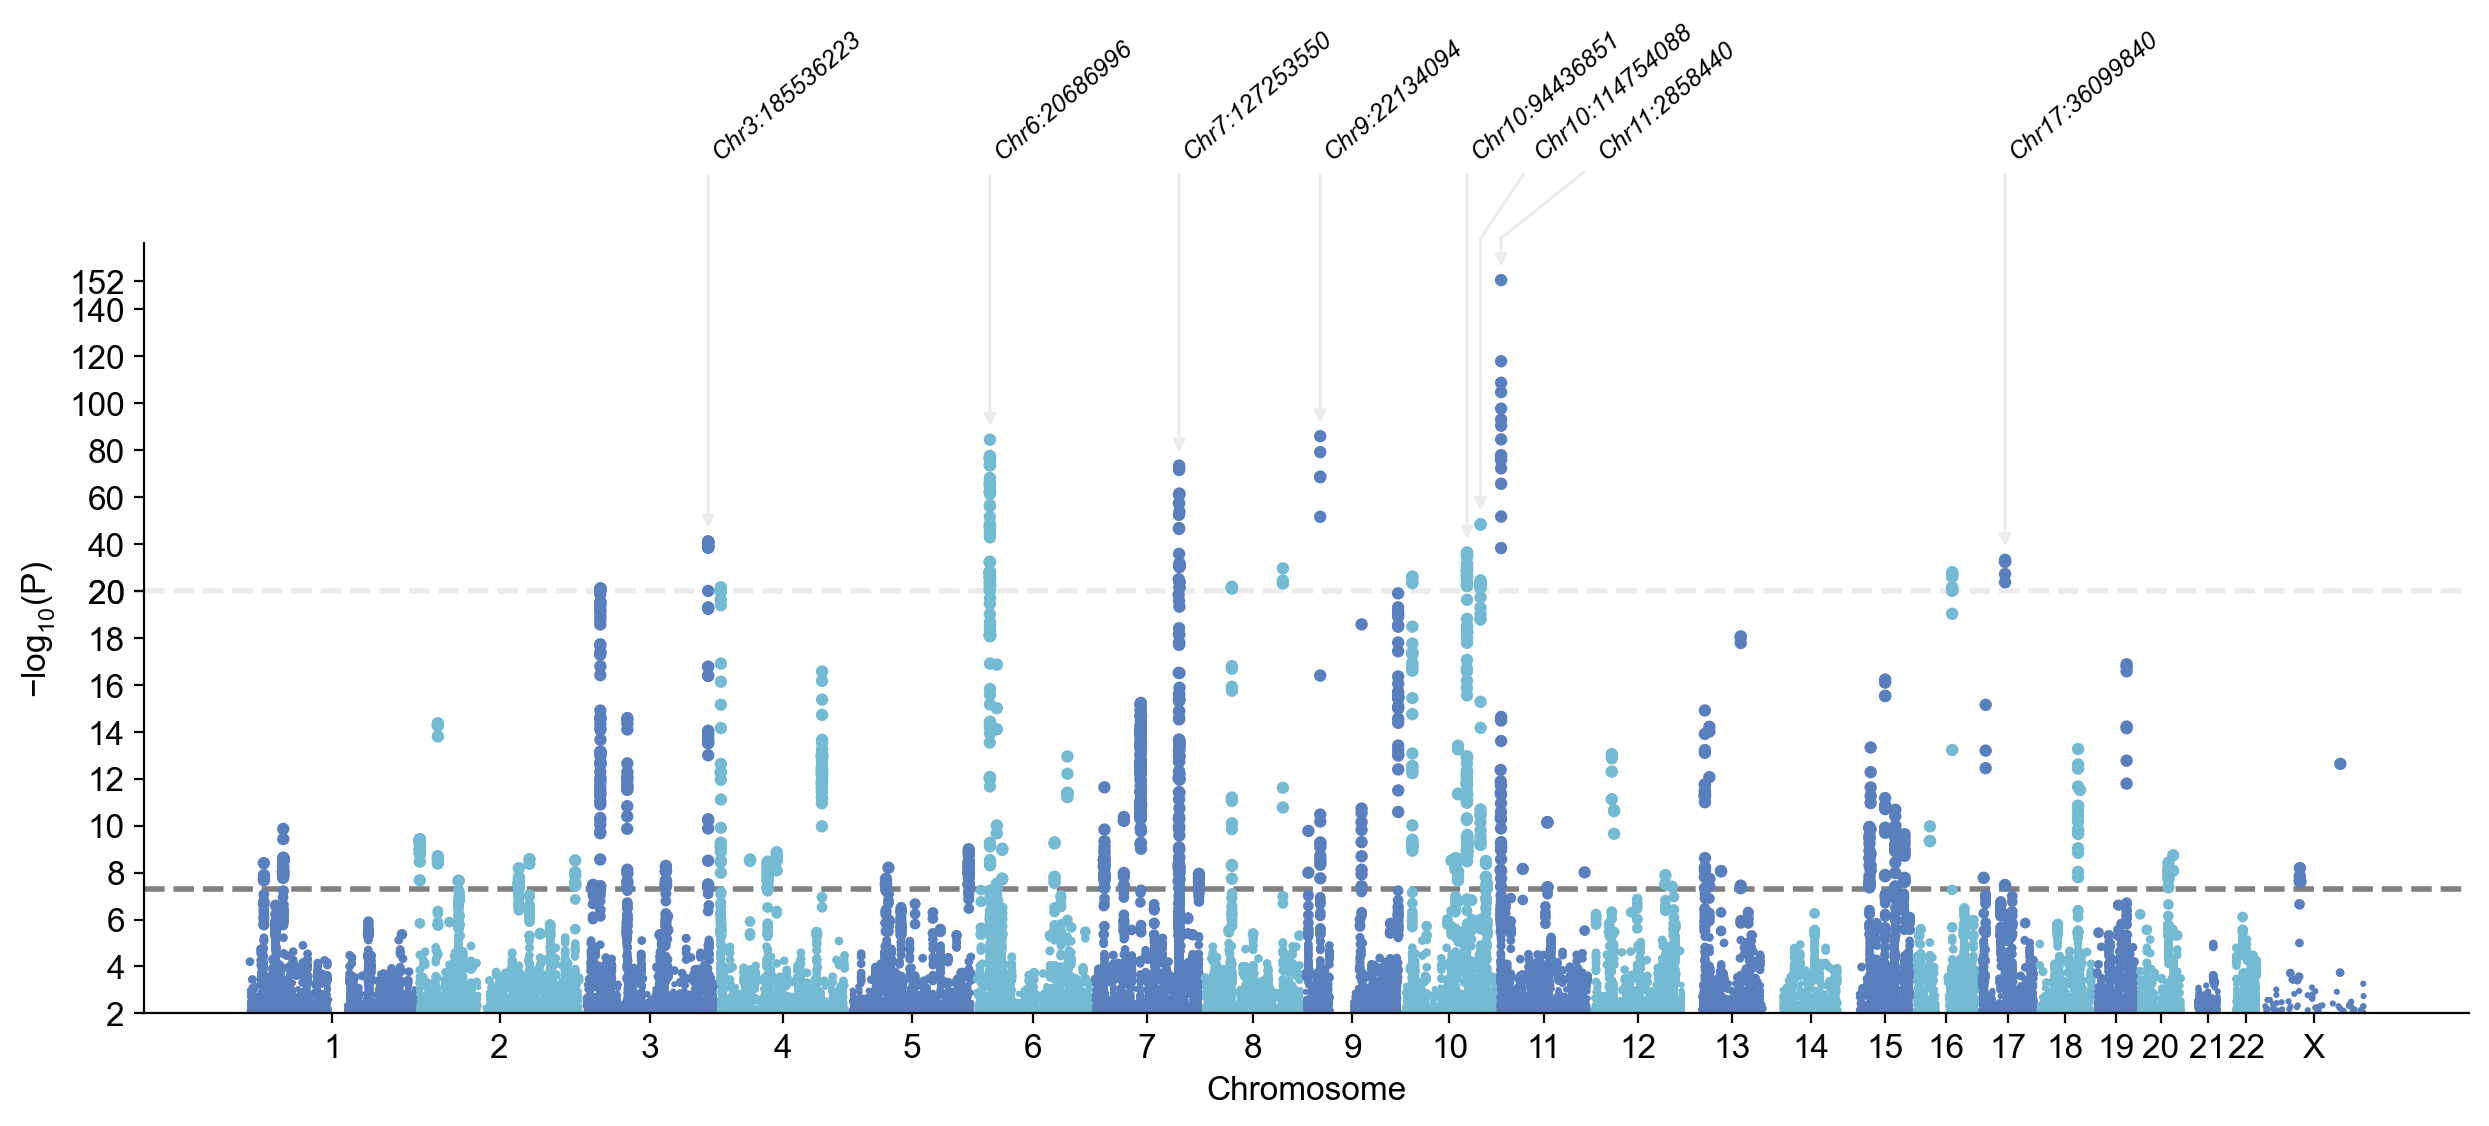

In [13]:
mysumstats.plot_mqq(skip=2, cut=20, mode="m", anno=True, anno_sig_level=1e-30)

GWASLab supports a wide range of customizable options. For details on other options for Manhattan and Q–Q plots, see: https://cloufield.github.io/gwaslab/Visualization/

In [14]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,STATUS,EAF,BETA,SE,P,N
0,1:752566_G_A,1,752566,G,A,1960099,0.8422,-0.0155,0.0131,0.2350,166718
1,1:752721_A_G,1,752721,G,A,1960099,0.2507,0.0204,0.0147,0.1650,166718
2,1:754182_A_G,1,754182,G,A,1960099,0.2505,0.0222,0.0166,0.1817,166718
3,1:760912_C_T,1,760912,C,T,1960099,0.8425,-0.0171,0.0148,0.2480,166718
4,1:761147_T_C,1,761147,C,T,1960099,0.1581,0.0171,0.0148,0.2480,166718
...,...,...,...,...,...,...,...,...,...,...,...
1103015,X:154343911_A_G,23,154343911,G,A,1960099,0.8058,0.0019,0.0090,0.8297,191764
1103016,X:154379088_C_A,23,154379088,C,A,1960099,0.7783,0.0027,0.0094,0.7723,191764
1103017,X:154536836_C_T,23,154536836,C,T,1960099,0.2196,-0.0084,0.0085,0.3192,191764
1103018,X:154763036_A_G,23,154763036,G,A,1960099,0.3686,-0.0102,0.0105,0.3302,191764


By checking the log, we can see that the sumstats look good. However, we still found several variants that were not normalized. GWASLab fixed the position and alleles for the unnormalized indels. GWASLab also standardized the notation for chromosome X to 23.

In fact, `.basic_check()` is a wrapper of the following basic functions, you can also use these separately.

- mysumstats.fix_ID()
- mysumstats.fix_chr()
- mysumstats.fix_pos()
- mysumstats.fix_allele()
- mysumstats.check_sanity()
- mysumstats.check_data_consistency()
- mysumstats.normalize_allele()
- mysumstats.remove_dup()

For other options, see: https://cloufield.github.io/gwaslab/Standardization/

## Extract lead variants : get_lead()

📖 **Documentation**: [Extract lead variants : get_lead()](https://cloufield.github.io/gwaslab/ExtractNovel/)


Let's extract the lead variants in each significant locus to check our data.

The significant loci are detected based on a sliding window (default window size: `windowsizekb=500` kb).

By specifying `anno=True`, GWASLab will also annotate the lead variant with its nearest gene names and distance.

**Note**: If you did not specify the build when loading the summary statistics or have not run `.infer_build()`, you need to explicitly set `build="19"` (GRCh37/hg19) or `build="38"` (GRCh38/hg38) here for annotation.

**Note**: GWASLab will download reference files when you run it for the first time. In this case, `ensembl_hg19_gtf_protein_coding` was downloaded and processed automatically.

In [15]:
mysumstats.get_lead(anno=True)

2025/12/25 20:50:46  -Genomic coordinates are based on GRCh37/hg19...
2025/12/25 20:50:46 Start to extract lead variants ...(v4.0.0)
2025/12/25 20:50:46  -Processing 1103020 variants...
2025/12/25 20:50:46  -Significance threshold : 5e-08
2025/12/25 20:50:46  -Sliding window size: 500  kb
2025/12/25 20:50:46  -Using P for extracting lead variants...
2025/12/25 20:50:46  -Found 1271 significant variants in total...
2025/12/25 20:50:46  -Identified 75 lead variants!
2025/12/25 20:50:46  -Annotating variants using references:ensembl
2025/12/25 20:50:46  -Annotating variants using references based on genome build:19
2025/12/25 20:50:46  -Genomic coordinates are based on GRCh37/hg19...
2025/12/25 20:50:46 Start to annotate variants with nearest gene name(s) ...(v4.0.0)
2025/12/25 20:50:46  -Current Dataframe shape : 75 x 12 ; Memory usage: 0.03 MB
2025/12/25 20:50:46  -Genomic coordinates are based on GRCh37/hg19...
2025/12/25 20:50:46  -Assigning Gene name using ensembl_hg19_gtf for protei

,SNPID,CHR,POS,EA,NEA,STATUS,EAF,BETA,SE,P,N,LOCATION,GENE
8927,1:22046558_A_C,1,22046558,C,A,1960099,0.2527,0.0607,0.0103,3.941000e-09,191764,0,USP48
19220,1:51174330_C_T,1,51174330,C,T,1960099,0.7902,0.0723,0.0113,1.380000e-10,191764,0,FAF1
90573,2:637597_C_T,2,637597,C,T,1960099,0.9017,0.0938,0.0150,3.725000e-10,191764,-29738,TMEM18
102403,2:27742603_T_C,2,27742603,C,T,1960099,0.5613,-0.0690,0.0088,4.358000e-15,191764,0,GCKR
117019,2:58959112_G_A,2,58959112,G,A,1960099,0.1754,0.0654,0.0117,2.237000e-08,191764,490605,FANCL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035288,19:46158643_G_T,19,46158643,G,T,1960099,0.6372,0.0805,0.0094,1.332000e-17,191764,9756,EML2
1059172,20:42989777_G_A,20,42989777,G,A,1960099,0.4503,0.0518,0.0088,3.770000e-09,191764,0,HNF4A
1062583,20:50155386_T_C,20,50155386,C,T,1960099,0.4266,0.0538,0.0090,1.836000e-09,191764,0,NFATC2
1101431,X:57150010_C_T,23,57150010,C,T,1960099,0.3012,0.0443,0.0076,6.427000e-09,191764,1000000,Unknown


We extracted a total of 75 lead variants with a sliding window size of 500 kb from this processed dataset.

For other options, see: https://cloufield.github.io/gwaslab/ExtractLead/

## Use the SNPID to create some highly customized mqq plot

📖 **Documentation**: [Use the SNPID to create some highly customized mqq plot](https://cloufield.github.io/gwaslab/Visualization/)


GWASLab can create highly customized Manhattan plots.

For example:
- Annotate the lead variants with closest gene names (threshold for annotation p < 1e-20)
- Annotate selected variants with user-provided texts
- Pinpoint some variants
- Highlight some loci
- MAF-stratified Q–Q plot
- Save as `my_first_mqq_plot.png` with `{"dpi":400,"facecolor":"white"}`

2025/12/25 20:50:49 Configured plot style for plot_mqq:mqq
2025/12/25 20:50:49  -QC is finished according to meta. Quick QC will be skipped.
2025/12/25 20:50:49 Starting Manhattan-QQ plot creation (Version v4.0.0)
2025/12/25 20:50:49  -Genomic coordinates are based on GRCh37/hg19...
2025/12/25 20:50:49  - Genomic coordinates version: 19 ...
2025/12/25 20:50:49  - Genome-wide significance level to plot is set to 5e-08 ...
2025/12/25 20:50:49  - Input sumstats contains 1103020 variants...
2025/12/25 20:50:49  - Manhattan-QQ plot layout mode selected: mqq
2025/12/25 20:50:49  -Highlight locis (#CB132D): 7:127253550_C_T,11:2858440_G_A
2025/12/25 20:50:49   -highlight_windowkb is set to: 1000 kb
2025/12/25 20:50:49  -Pinpoint variants (green): 9:22134094_T_C,6:20686996_C_A
2025/12/25 20:50:49  -POS data type is already numeric. Skipping conversion...
2025/12/25 20:50:49  -CHR data type is already numeric. Skipping conversion...
2025/12/25 20:50:49  -EAF data type is already numeric. Skippin

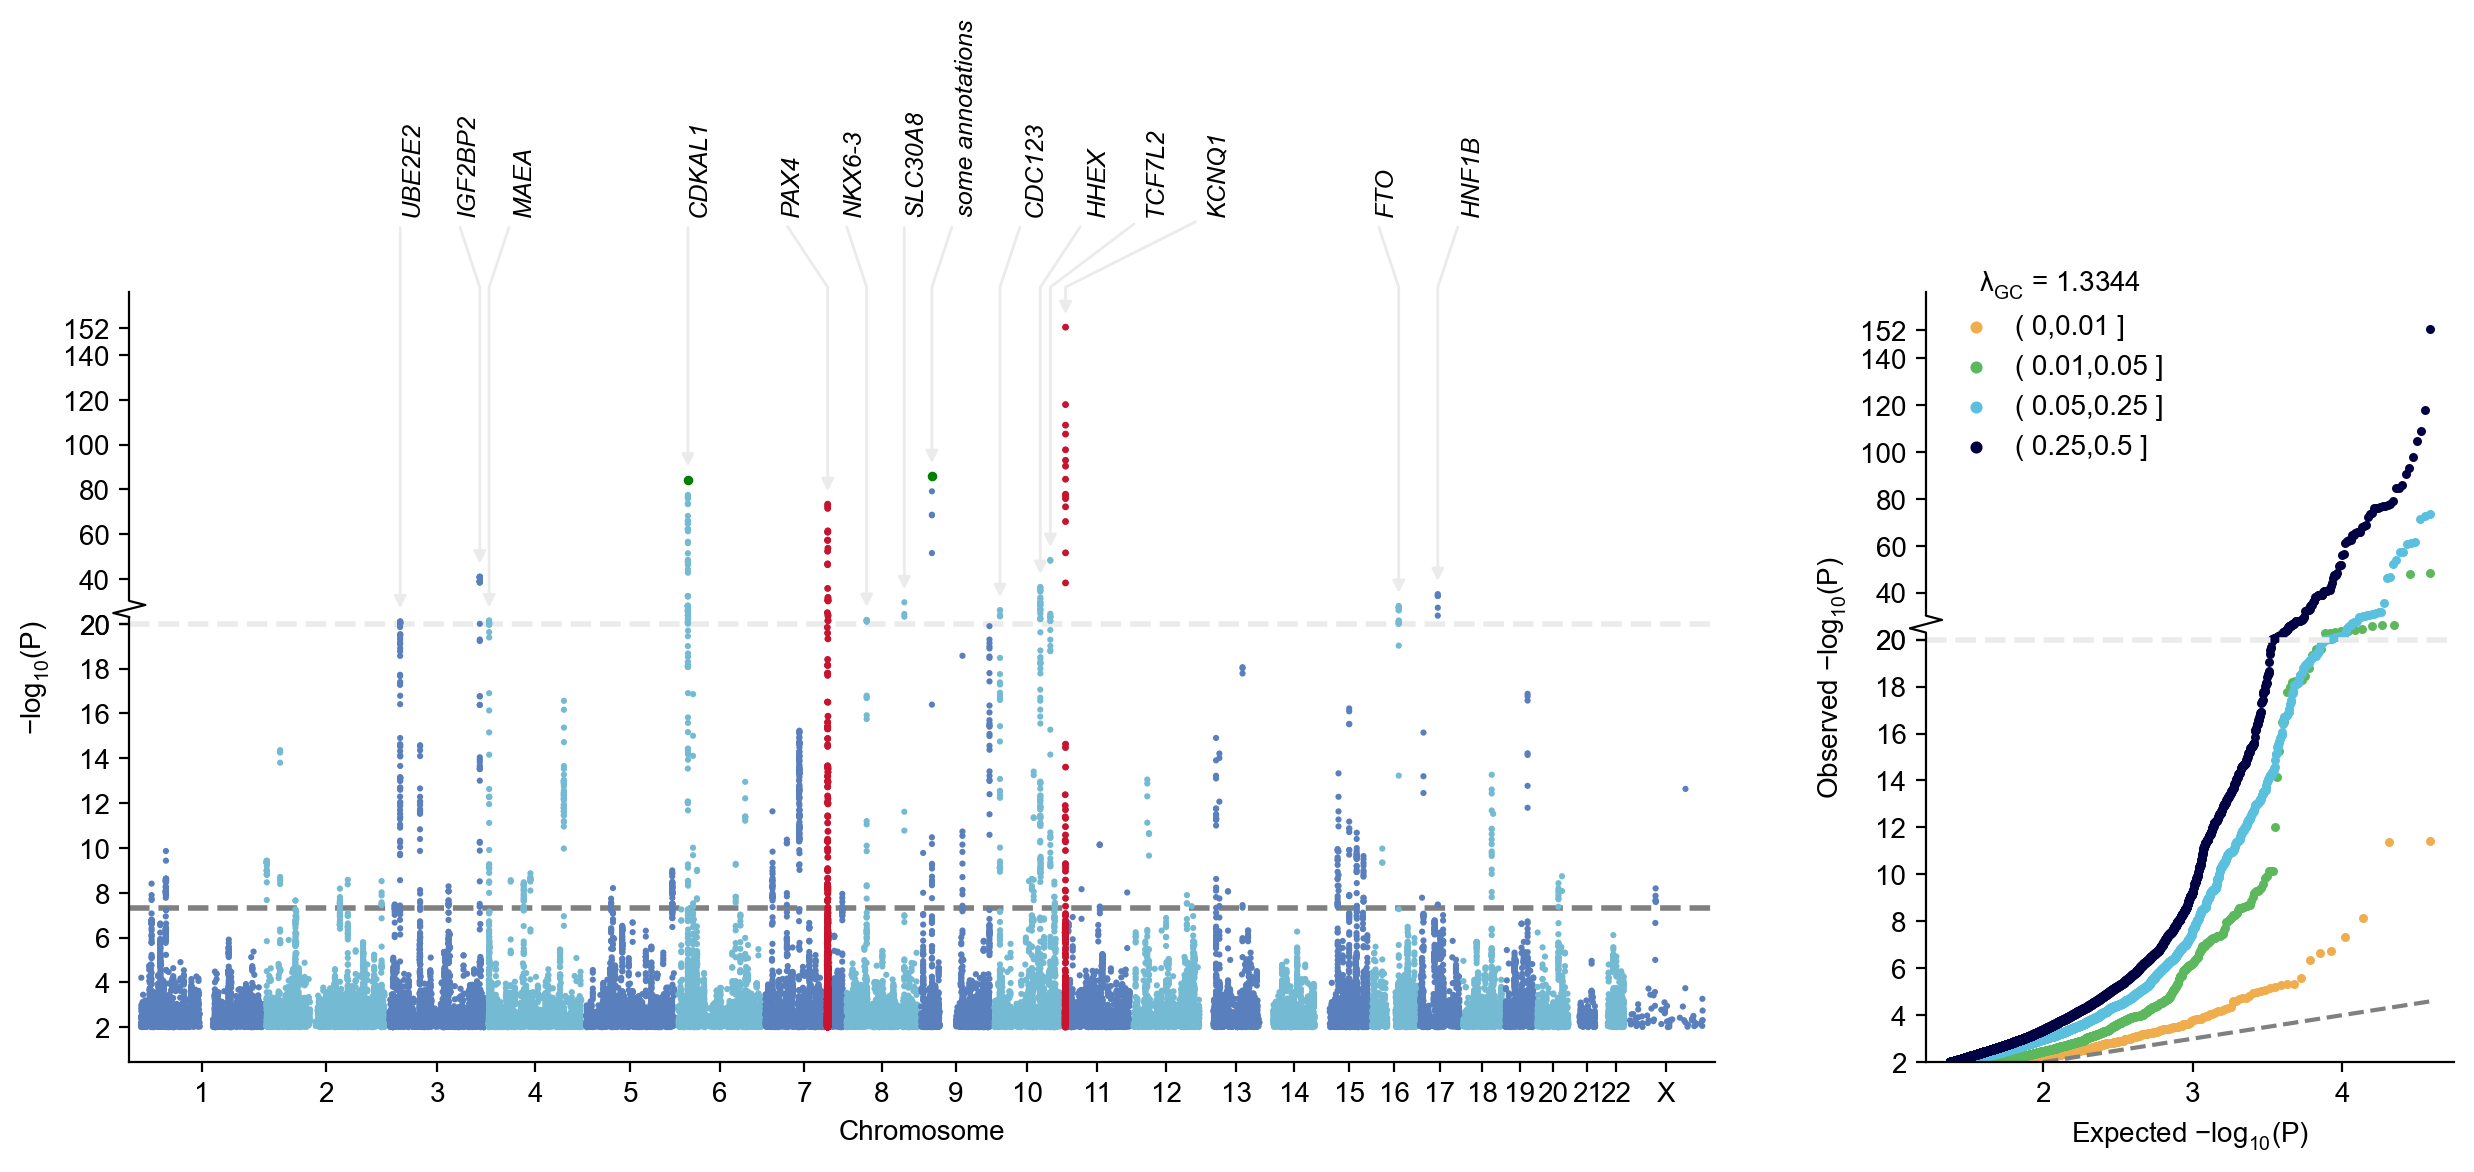

In [16]:
mysumstats.plot_mqq(mode="mqq",
                    cut=20,
                    skip=2,
                    anno="GENENAME",
                    anno_sig_level=1e-20,
                    anno_alias={"9:22134094_T_C":"some annotations"},
                    anno_style="expand",
                    xpad=0.01,
                    pinpoint=["9:22134094_T_C","6:20686996_C_A"], 
                    pinpoint_color="green",
                    highlight=["7:127253550_C_T","11:2858440_G_A"],
                    highlight_windowkb=1000,
                    stratified=True,
                    jagged=True,
                    marker_size=(5,5),
                    fig_kwargs={"figsize":(15,5),"dpi":300},
                    save="my_first_mqq_plot.png", 
                    save_kwargs={"dpi":400,"facecolor":"white"})

For details, see: https://cloufield.github.io/gwaslab/Visualization/

## Quick regional plot without LD-information

📖 **Documentation**: [Quick regional plot without LD-information](https://cloufield.github.io/gwaslab/RegionalPlot/)


GWASLab can also plot regional plots with or without LD reference files.

For details, see: https://cloufield.github.io/gwaslab/RegionalPlot/

We first create a regional plot without LD references by specifying `mode` and `region`.

2025/12/25 20:50:55 Filtered out args for `plot_mqq`: highlight
2025/12/25 20:50:55 Configured plot style for plot_mqq:r
2025/12/25 20:50:55  -QC is finished according to meta. Quick QC will be skipped.
2025/12/25 20:50:55 Starting Region plot creation (Version v4.0.0)
2025/12/25 20:50:55  -Genomic coordinates are based on GRCh37/hg19...
2025/12/25 20:50:55  - Genomic coordinates version: 19 ...
2025/12/25 20:50:55  - Genome-wide significance level to plot is set to 5e-08 ...
2025/12/25 20:50:55  - Input sumstats contains 1103020 variants...
2025/12/25 20:50:55  - Region plot layout mode selected: r
2025/12/25 20:50:55  -Region to plot : chr7:126253550-128253550.
2025/12/25 20:50:55  -POS data type is already numeric. Skipping conversion...
2025/12/25 20:50:55  -CHR data type is already numeric. Skipping conversion...
2025/12/25 20:50:55  -Normalized region: (CHR=7, START=126253550, END=128253550)
2025/12/25 20:50:55 Start to filter variants within a specific genomic region ...(v4.0.0)

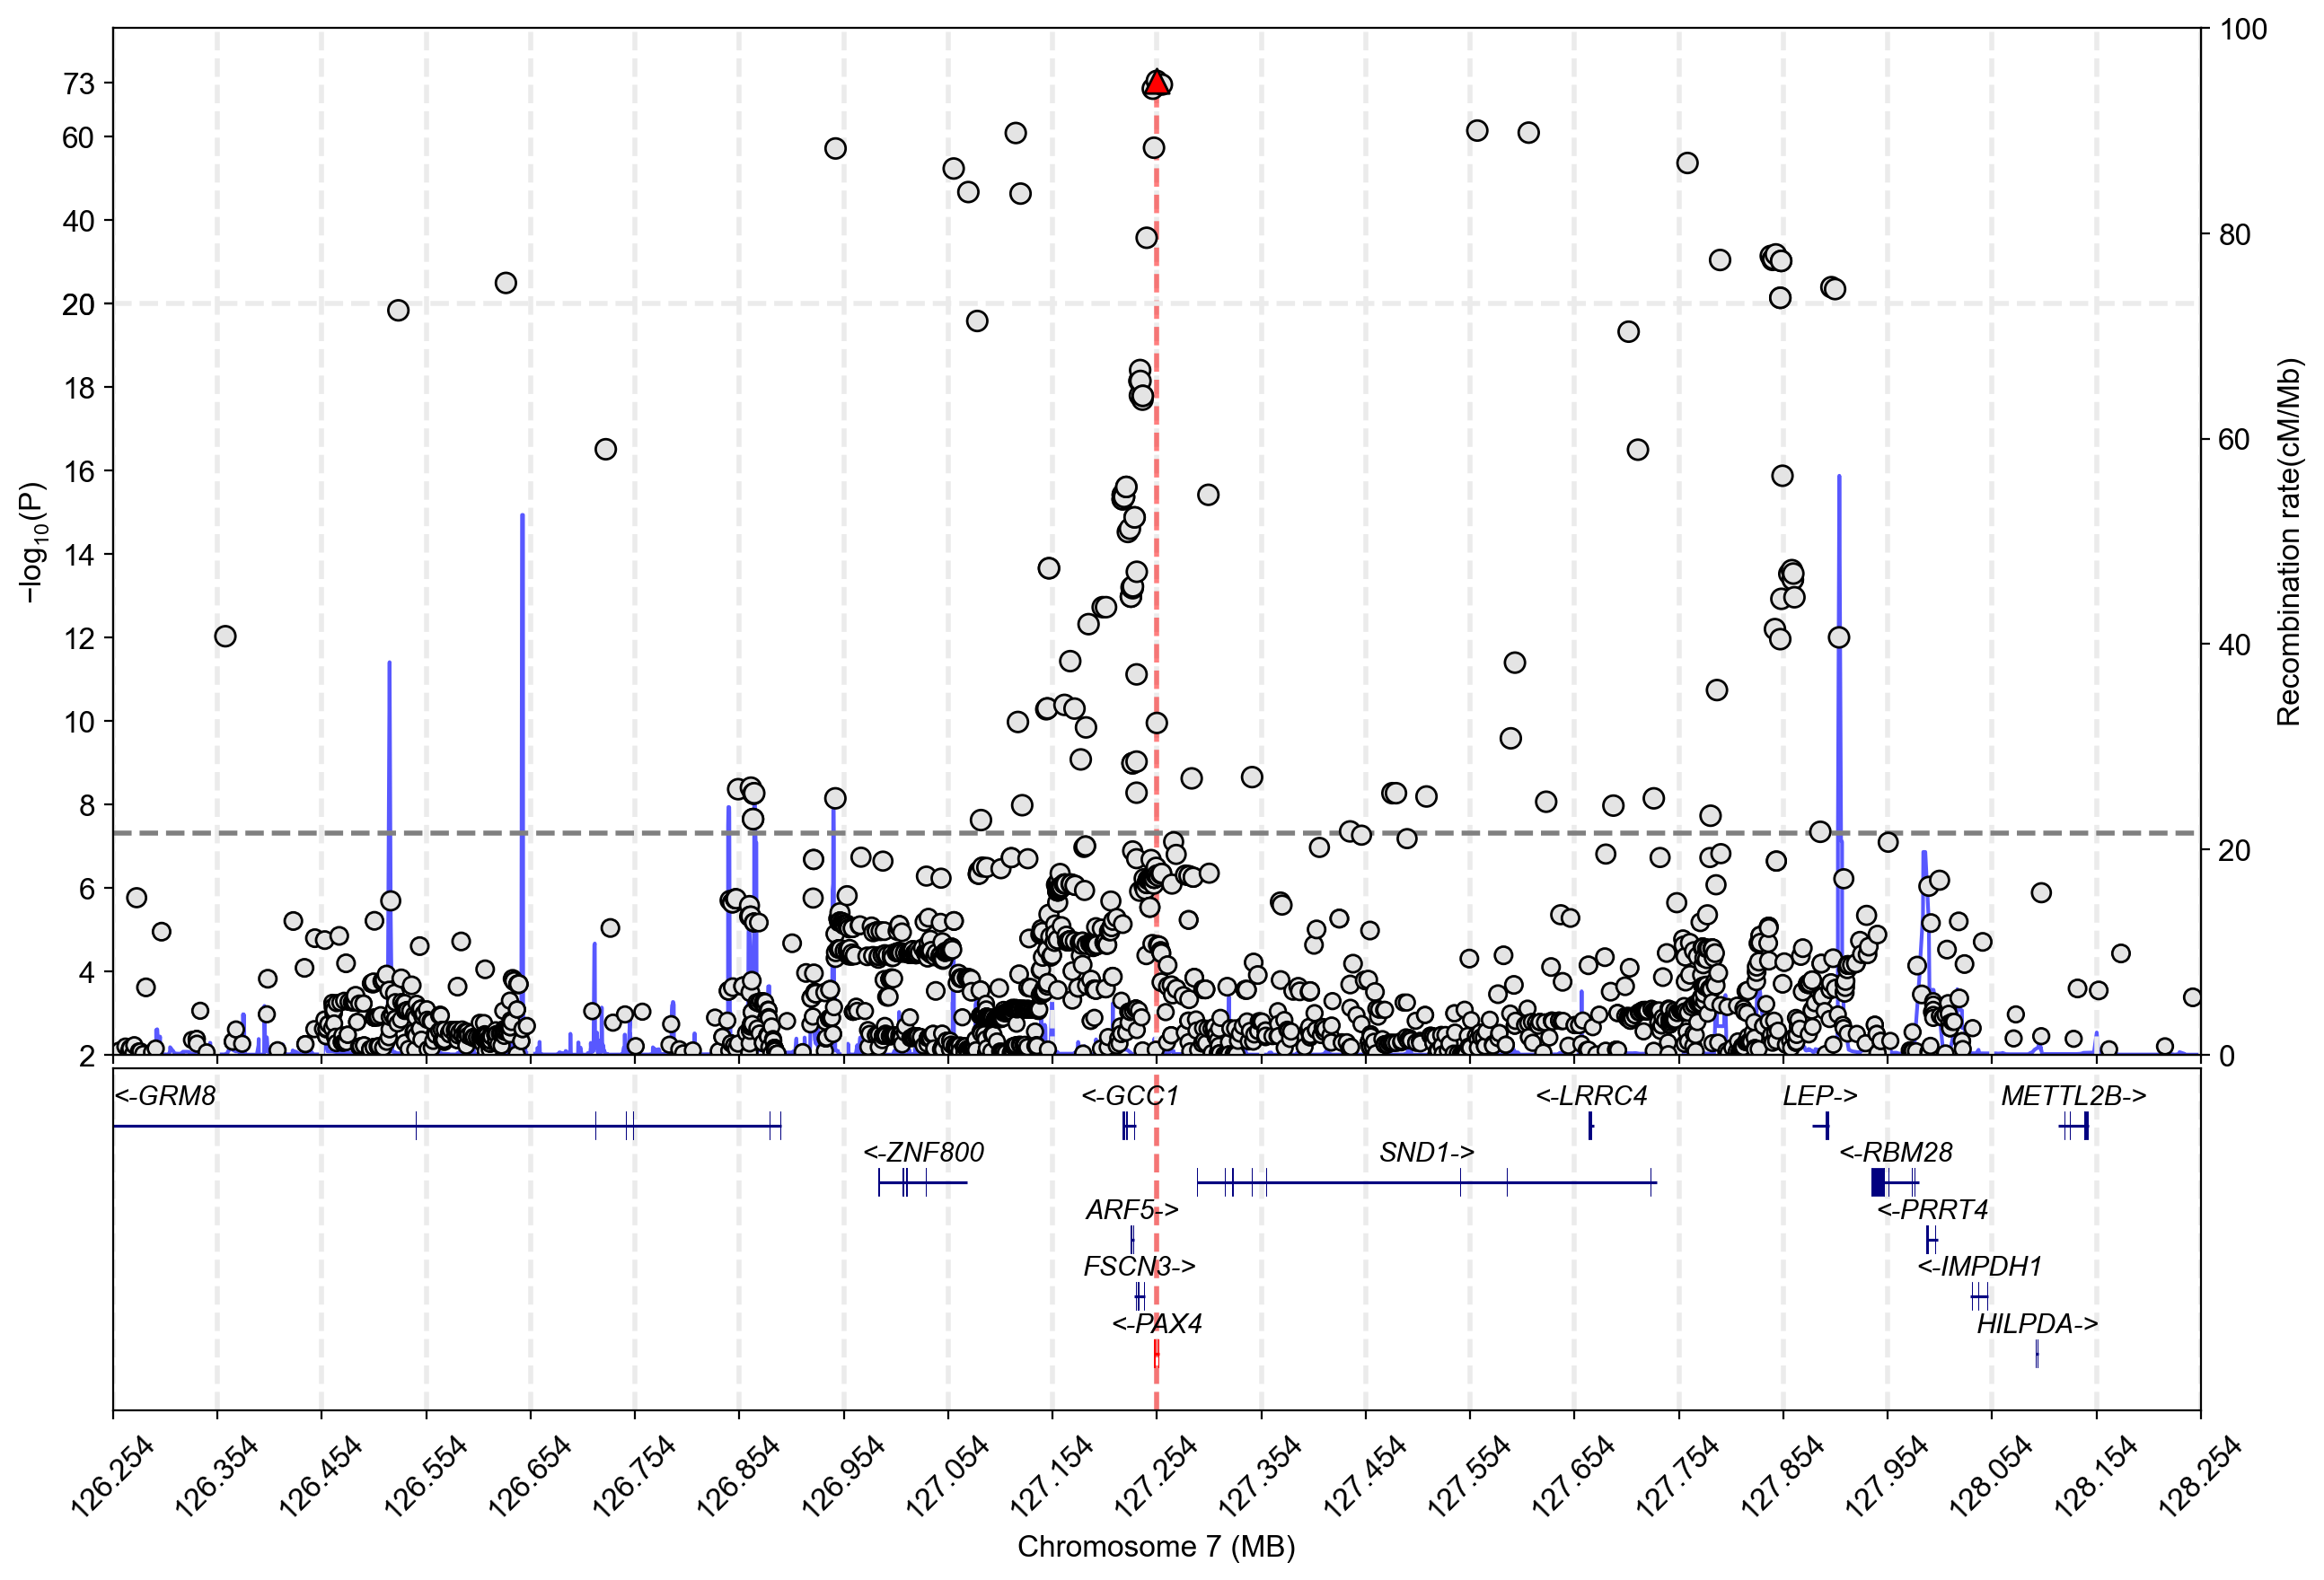

In [17]:
mysumstats.plot_mqq(mode="r",skip=2,cut=20, region=(7,126253550,128253550),region_grid=True)

## Reference file downloading

📖 **Documentation**: [Reference file downloading](https://cloufield.github.io/gwaslab/Download/)


Full regional plots with LD information will require either user-provided VCF files or preprocessed VCF files by GWASLab (e.g., 1000 Genomes project; see Reference: https://cloufield.github.io/gwaslab/Reference/).

GWASLab provides preprocessed 1KG datasets for downloading.

### check available reference from gwaslab

📖 **Documentation**: [# check available reference from gwaslab](https://cloufield.github.io/gwaslab/Download/)


Update the available reference list first if needed:

In [18]:
gl.check_available_ref()

2025/12/25 20:51:00 Start to check available reference files...
2025/12/25 20:51:00  - Avaiable keywords:  1kg_eas_hg19 1kg_eur_hg19 1kg_eas_hg38 1kg_eur_hg38 1kg_sas_hg19 1kg_amr_hg19 1kg_sas_hg38 1kg_amr_hg38 1kg_afr_hg19 1kg_pan_hg19 1kg_afr_hg38 1kg_pan_hg38 dbsnp_v151_hg19 dbsnp_v151_hg38 dbsnp_v157_hg19 dbsnp_v157_hg38 ucsc_genome_hg19 ucsc_genome_hg38 1kg_dbsnp151_hg19_auto 1kg_dbsnp151_hg38_auto recombination_hg19 recombination_hg38 ensembl_hg19_gtf ensembl_hg38_gtf refseq_hg19_gtf refseq_hg38_gtf testlink 19to38 38to19 1kg_hm3_hg38_eaf 1kg_hm3_hg19_eaf


{'1kg_eas_hg19': {'description': '1000 Genomes Project East Asian (1KG EAS) VCF on the hg19 reference. Multi-allelic variants were decomposed. Variants were normalized. The INFO field includes the AF annotation, representing allele frequency in the EAS population.',
  'suggested_use': 'LD reference panel for creating region plot; infer strand for EAS population'},
 '1kg_eur_hg19': {'description': '1000 Genomes Project European (1KG EUR) VCF on the hg19 reference. Multi-allelic variants were decomposed. Variants were normalized. The INFO field includes the AF annotation, representing allele frequency in the EUR population.',
  'suggested_use': 'LD reference panel for creating region plot; infer strand for EUR population'},
 '1kg_eas_hg38': {'description': '1000 Genomes Project East Asian (1KG EAS) VCF on the hg38 reference. Multi-allelic variants were decomposed. Variants were normalized. The INFO field includes the AF annotation, representing allele frequency in the EAS population.',
 

You can see the currently available reference files (from the original source or preprocessed by GWASLab). 

### download reference using gwaslab

📖 **Documentation**: [# download reference using gwaslab](https://cloufield.github.io/gwaslab/Download/)


Select the keyword and use `download_ref` to download the files. The downloaded files will be placed in `~/.gwaslab` by default.
- `1kg_eas_hg19`: processed 1000 Genomes Project EAS samples dataset (hg19; ~2.8GB). It may take several minutes to download.

In [19]:
# ~2.8GB
# gl.download_ref("1kg_eas_hg19")

In [20]:
# gl.check_downloaded_ref()

After downloading, use `get_path` to obtain the file path by specifying the keyword.

In [21]:
# gl.get_path("1kg_eas_hg19")

**Note**: 
- If `tabix` is available in PATH, the speed will be greatly improved. Otherwise, vcf files will be loaded from the head. 
- tabix: http://www.htslib.org/download/

### Region plots with or with out LD reference files.

📖 **Documentation**: [# Region plots with or with out LD reference files....](https://cloufield.github.io/gwaslab/RegionalPlot/)


To create a regional plot with LD information, you need to pass the path of the reference VCF to `vcf_path`.

- For this tutorial, we use the `1kg_eas_hg19.chr7_126253550_128253550.vcf.gz` included in the sample dataset.
- You can also use the downloaded preprocessed file like `vcf_path = gl.get_path("1kg_eas_hg19")` or your own VCF files.

In [22]:
# gl.download_ref("ensembl_hg19_gtf")

2025/12/25 20:51:00 Filtered out args for `plot_mqq`: highlight
2025/12/25 20:51:00 Configured plot style for plot_mqq:r
2025/12/25 20:51:00  -QC is finished according to meta. Quick QC will be skipped.
2025/12/25 20:51:00 Starting Region plot creation (Version v4.0.0)
2025/12/25 20:51:00  -Genomic coordinates are based on GRCh37/hg19...
2025/12/25 20:51:00  - Genomic coordinates version: 19 ...
2025/12/25 20:51:00  - Genome-wide significance level to plot is set to 5e-08 ...
2025/12/25 20:51:00  - Input sumstats contains 1103020 variants...
2025/12/25 20:51:00  - Region plot layout mode selected: r
2025/12/25 20:51:00  -Region to plot : chr7:126253550-128253550.
2025/12/25 20:51:00  -POS data type is already numeric. Skipping conversion...
2025/12/25 20:51:00  -CHR data type is already numeric. Skipping conversion...
2025/12/25 20:51:00  -Normalized region: (CHR=7, START=126253550, END=128253550)
2025/12/25 20:51:00 Start to filter variants within a specific genomic region ...(v4.0.0)

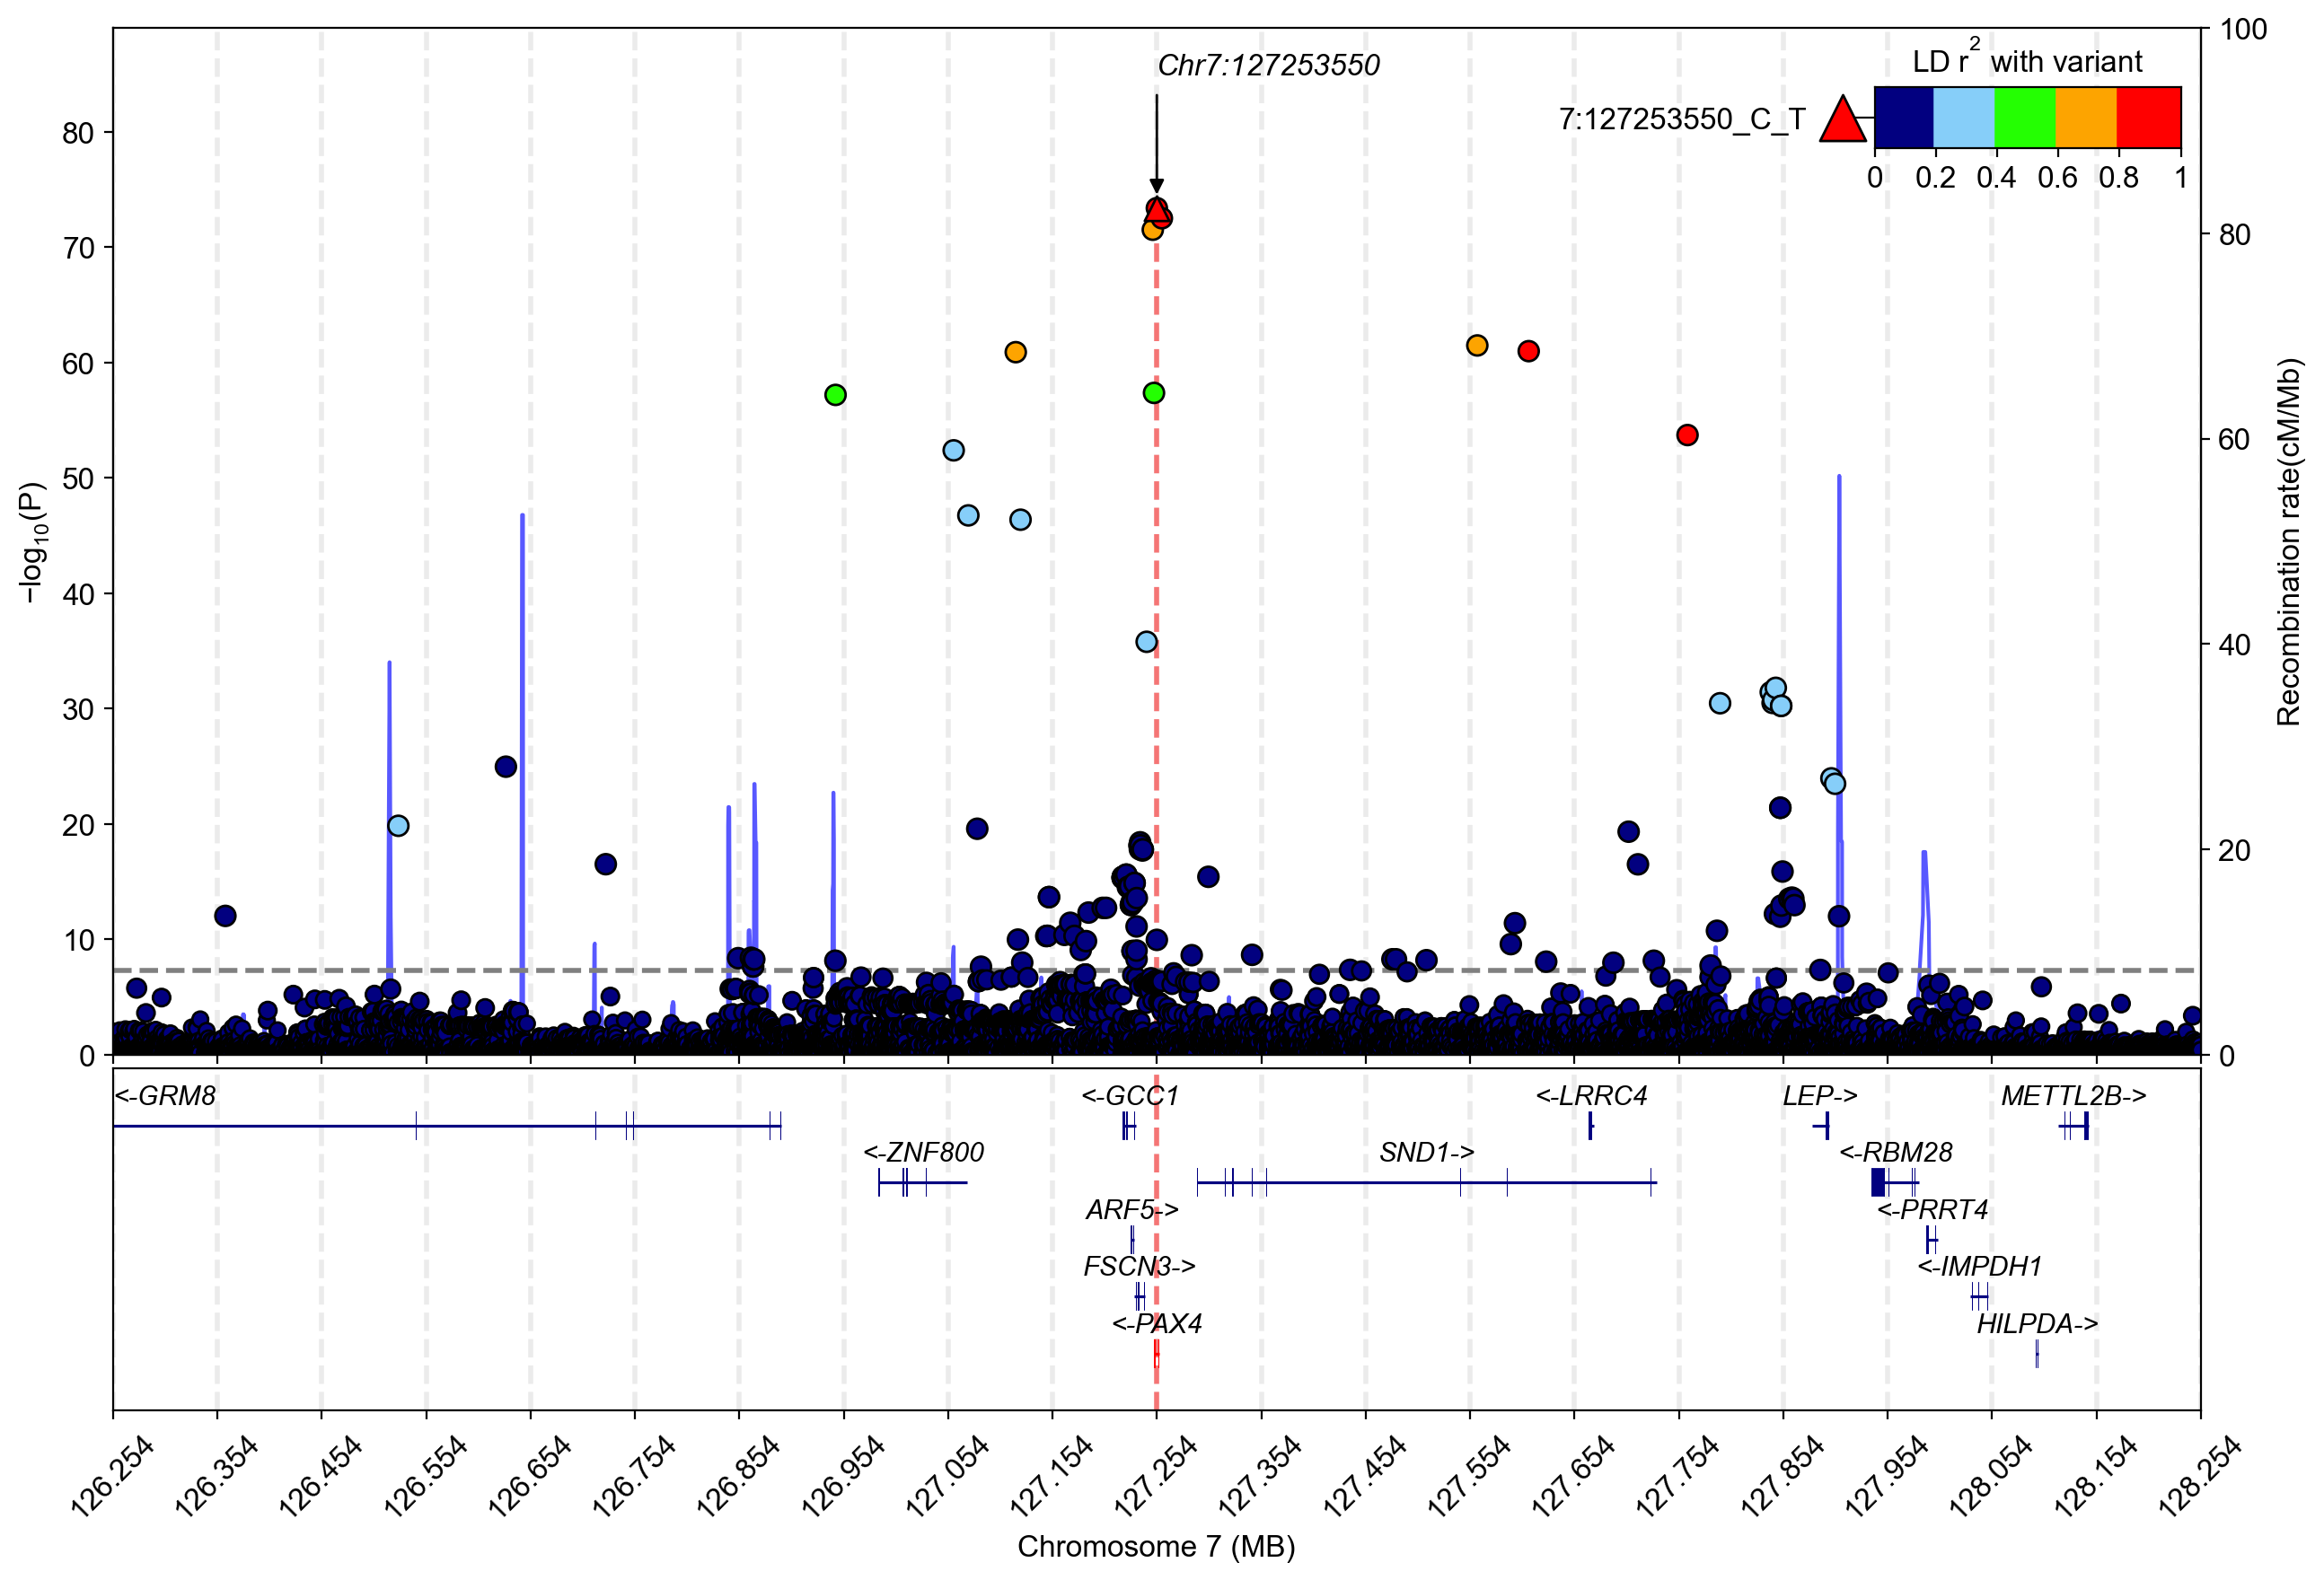

In [23]:
mysumstats.plot_mqq(mode="r",
                    region=(7,126253550,128253550),
                    region_grid=True,
                    anno=True,
                    anno_kwargs={"rotation":0,"fontsize":12},
                    vcf_path="gwaslab-sample-data/1kg_eas_hg19.chr7_126253550_128253550.vcf.gz")

**Note**: 
- GWASLab's default genome build version is `build="19"` (GRCh37/hg19). You can change it to `build="38"` (GRCh38/hg38) when needed.
- For gene tracks, the default is `gtf_path="ensembl"`. You can also use `gtf_path="refseq"` (NCBI RefSeq).

## Annotate rsID

📖 **Documentation**: [Annotate rsID](https://cloufield.github.io/gwaslab/AssignrsID/)


rsID is assigned using two types of reference files:
- `ref_rsid_tsv`: TSV file for annotation of commonly used variants
- `ref_rsid_vcf`: VCF file for annotation of other variants

GWASLab provides preprocessed TSV files for 1KG variants (~80M). We can download the file using `.download_ref` with keywords. This time we will use `1kg_dbsnp151_hg19_auto`, which is the SNPID-rsID conversion table for autosomal variants in the 1KG project (hg19). This will take around a few minutes to download.

In [24]:
# 961M
# gl.download_ref("1kg_dbsnp151_hg19_auto")

For now, we use the `1kg_dbsnp151_hg19_auto_hm3_chr7_variants.txt.gz` included in the sample dataset.

In [25]:
mysumstats.assign_rsid(ref_rsid_tsv="gwaslab-sample-data/1kg_dbsnp151_hg19_auto_hm3_chr7_variants.txt.gz")

2025/12/25 20:51:10 Start to assign rsID using reference file ...(v4.0.0)
2025/12/25 20:51:10  -Current Dataframe shape : 1103020 x 11 ; Memory usage: 79.97 MB
2025/12/25 20:51:10  -1103020 rsID could be possibly fixed...
2025/12/25 20:51:10  -Setting block size:  5000000
2025/12/25 20:51:10  -Loading block: 0   
2025/12/25 20:51:12  -rsID annotation for 1103020 needed to be fixed!
2025/12/25 20:51:12  -Annotated 0 rsID successfully!
2025/12/25 20:51:13  -Current Dataframe shape : 1103020 x 12 ; Memory usage: 88.38 MB
2025/12/25 20:51:13 Finished assign rsID using reference file.


,SNPID,CHR,POS,EA,NEA,STATUS,EAF,BETA,SE,P,N,rsID
0,1:752566_G_A,1,752566,G,A,1960099,0.8422,-0.0155,0.0131,0.2350,166718,<NA>
1,1:752721_A_G,1,752721,G,A,1960099,0.2507,0.0204,0.0147,0.1650,166718,<NA>
2,1:754182_A_G,1,754182,G,A,1960099,0.2505,0.0222,0.0166,0.1817,166718,<NA>
3,1:760912_C_T,1,760912,C,T,1960099,0.8425,-0.0171,0.0148,0.2480,166718,<NA>
4,1:761147_T_C,1,761147,C,T,1960099,0.1581,0.0171,0.0148,0.2480,166718,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
1103015,X:154343911_A_G,23,154343911,G,A,1960099,0.8058,0.0019,0.0090,0.8297,191764,<NA>
1103016,X:154379088_C_A,23,154379088,C,A,1960099,0.7783,0.0027,0.0094,0.7723,191764,<NA>
1103017,X:154536836_C_T,23,154536836,C,T,1960099,0.2196,-0.0084,0.0085,0.3192,191764,<NA>
1103018,X:154763036_A_G,23,154763036,G,A,1960099,0.3686,-0.0102,0.0105,0.3302,191764,<NA>


For the annotation of less common variants, we can use VCF files downloaded from NCBI dbSNP (https://ftp.ncbi.nih.gov/snp/latest_release/VCF/).

**Note**:
- The file size is huge (>20GB) and it might take several hours to download. (We can skip this step in this tutorial.)
- Specify `chr_dict` to match the chromosome notations in sumstats and VCF files.

Parameters:
- `ref_rsid_vcf`: the path to the reference rsID VCF file
- `threads`: number of threads to use

For this tutorial, we use `b157_2564.vcf.gz` in the sample dataset, which is extracted from the b157 version of dbSNP VCF.

In [26]:
### normal mode

In [27]:
mysumstats.assign_rsid(threads=1,
                       ref_rsid_vcf="gwaslab-sample-data/b157_2564.vcf.gz"
                       #chr_dict = gl.get_number_to_NC(build="19")
                      )

2025/12/25 20:51:13 Start to assign rsID using reference file ...(v4.0.0)
2025/12/25 20:51:13  -Checking chromosome notations in VCF/BCF files...
2025/12/25 20:51:13   -RefSeq ID detected (hg19) in VCF/BCF...
2025/12/25 20:51:13  -Assigning rsID based on CHR:POS and REF:ALT/ALT:REF...
2025/12/25 20:51:32  -rsID Annotation for 1100554 need to be fixed!
2025/12/25 20:51:32  -Annotated 2466 rsID successfully!
2025/12/25 20:51:32 Finished assign rsID using reference file.


,SNPID,CHR,POS,EA,NEA,STATUS,EAF,BETA,SE,P,N,rsID
0,1:752566_G_A,1,752566,G,A,1960099,0.8422,-0.0155,0.0131,0.2350,166718,<NA>
1,1:752721_A_G,1,752721,G,A,1960099,0.2507,0.0204,0.0147,0.1650,166718,<NA>
2,1:754182_A_G,1,754182,G,A,1960099,0.2505,0.0222,0.0166,0.1817,166718,<NA>
3,1:760912_C_T,1,760912,C,T,1960099,0.8425,-0.0171,0.0148,0.2480,166718,<NA>
4,1:761147_T_C,1,761147,C,T,1960099,0.1581,0.0171,0.0148,0.2480,166718,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
1103015,X:154343911_A_G,23,154343911,G,A,1960099,0.8058,0.0019,0.0090,0.8297,191764,rs4898358
1103016,X:154379088_C_A,23,154379088,C,A,1960099,0.7783,0.0027,0.0094,0.7723,191764,rs5987090
1103017,X:154536836_C_T,23,154536836,C,T,1960099,0.2196,-0.0084,0.0085,0.3192,191764,rs12013168
1103018,X:154763036_A_G,23,154763036,G,A,1960099,0.3686,-0.0102,0.0105,0.3302,191764,rs5940466


After this, only 98 variants were not annotated, mostly indels that are not available in the reference VCF.

In [28]:
mysumstats.data.loc[mysumstats.data["rsID"].isna(),:]

,SNPID,CHR,POS,EA,NEA,STATUS,EAF,BETA,SE,P,N,rsID
0,1:752566_G_A,1,752566,G,A,1960099,0.8422,-0.0155,0.0131,0.2350,166718,<NA>
1,1:752721_A_G,1,752721,G,A,1960099,0.2507,0.0204,0.0147,0.1650,166718,<NA>
2,1:754182_A_G,1,754182,G,A,1960099,0.2505,0.0222,0.0166,0.1817,166718,<NA>
3,1:760912_C_T,1,760912,C,T,1960099,0.8425,-0.0171,0.0148,0.2480,166718,<NA>
4,1:761147_T_C,1,761147,C,T,1960099,0.1581,0.0171,0.0148,0.2480,166718,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
1102883,X:145493373_TAA_T,23,145493373,TAA,T,1960399,0.1006,0.0098,0.0120,0.4141,191764,<NA>
1102893,X:145943926_TA_T,23,145943926,TA,T,1960399,0.5974,-0.0076,0.0118,0.5213,191764,<NA>
1102959,X:151172462_CGT_C,23,151172462,C,CGT,1960399,0.7959,0.0066,0.0138,0.6319,191764,<NA>
1102972,X:152032452_A_AT,23,152032452,AT,A,1960399,0.9633,0.0111,0.0239,0.6411,191764,<NA>


### fast implementation using bcftools: sweep mode

📖 **Documentation**: [# fast implementation using bcftools: sweep mode...](https://cloufield.github.io/gwaslab/AssignrsID/)


In [29]:
mysumstats.assign_rsid2(path="gwaslab-sample-data/b157_2564.vcf.gz",overwrite="all")

2025/12/25 20:51:33 Start to assign rsID from reference ...(v4.0.0)
2025/12/25 20:51:33  -Determining reference mode: vcf/bcf...
2025/12/25 20:51:33  -Extracting new lookup TSV from: gwaslab-sample-data/b157_2564.vcf.gz...
2025/12/25 20:51:33 Start to extract lookup table from vcf/bcf ...(v4.0.0)
2025/12/25 20:51:33  -Current Dataframe shape : 1103020 x 2 ; Memory usage: 27.35 MB
2025/12/25 20:51:33  -Checking chromosome notations in VCF/BCF files...
2025/12/25 20:51:33   -RefSeq ID detected (hg19) in VCF/BCF...
2025/12/25 20:51:33  -Running multiprocessing: 6 workers, 23 chromosomes
2025/12/25 20:51:33  -Calling: bcftools view -r <CHR> -T <TARGETS> -Ou <VCF>| bcftools query -f '<FMT>'
2025/12/25 20:51:33  -Finished: 5 3 1 4 2 6 9 10 8 12 7 11 15 13 18 16 14 17 19 21 22 23 20
2025/12/25 20:51:34  -Lookup table created: /tmp/tmpu8un07do.lookup.txt.gz
2025/12/25 20:51:34 Finished extracting lookup table from vcf/bcf.
2025/12/25 20:51:34 Start to assign from lookup table ...(v4.0.0)
2025/

,SNPID,CHR,POS,EA,NEA,STATUS,EAF,BETA,SE,P,N,rsID,ALLELE_FLIPPED
0,1:752566_G_A,1,752566,G,A,1960099,0.8422,-0.0155,0.0131,0.2350,166718,<NA>,False
1,1:752721_A_G,1,752721,G,A,1960099,0.2507,0.0204,0.0147,0.1650,166718,<NA>,False
2,1:754182_A_G,1,754182,G,A,1960099,0.2505,0.0222,0.0166,0.1817,166718,<NA>,False
3,1:760912_C_T,1,760912,C,T,1960099,0.8425,-0.0171,0.0148,0.2480,166718,<NA>,False
4,1:761147_T_C,1,761147,C,T,1960099,0.1581,0.0171,0.0148,0.2480,166718,<NA>,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103015,X:154343911_A_G,23,154343911,G,A,1960099,0.8058,0.0019,0.0090,0.8297,191764,rs4898358,False
1103016,X:154379088_C_A,23,154379088,C,A,1960099,0.7783,0.0027,0.0094,0.7723,191764,rs5987090,True
1103017,X:154536836_C_T,23,154536836,C,T,1960099,0.2196,-0.0084,0.0085,0.3192,191764,rs12013168,True
1103018,X:154763036_A_G,23,154763036,G,A,1960099,0.3686,-0.0102,0.0105,0.3302,191764,rs5940466,False


## Harmonization

📖 **Documentation**: [Harmonization](https://cloufield.github.io/gwaslab/Harmonization/)


GWASLab can harmonize the sumstats based on reference files.

- `ref_seq`: reference genome FASTA file for allele alignment
- `ref_infer`: VCF file with allele frequency information for inferring strand and comparing allele frequency
- `ref_alt_freq`: field in INFO of VCF file for alternative allele frequency

For details see: https://cloufield.github.io/gwaslab/Harmonization/

For reference data, see: https://cloufield.github.io/gwaslab/Reference/

We can use the reference genome from 1000 Genomes. 

http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/human_g1k_v37.fasta.gz
http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/human_g1k_v37.fasta.fai

When calling `.harmonize()`, `.basic_check()` will be called first to make sure the dataset is ready for harmonization. Since we have already performed `basic_check`, we set `basic_check=False` here. For `ref_infer`, we pass the downloaded VCF files for 1KG EAS and specify the field for alternative allele frequency to AF by `ref_alt_freq="AF"`.  

In [30]:
mysumstats.harmonize(basic_check=False,
                     threads=3,
                     ref_seq="gwaslab-sample-data/chr7.fasta.gz",
                     ref_infer="gwaslab-sample-data/1kg_eas_hg19.chr7_126253550_128253550.vcf.gz",
                     ref_alt_freq="AF")

2025/12/25 20:51:35 Start to check if NEA is aligned with reference sequence ...(v4.0.0)
2025/12/25 20:51:35  -Reference genome FASTA file: gwaslab-sample-data/chr7.fasta.gz
2025/12/25 20:51:35    -Loading and building numpy fasta records:1  2  3  4  5  6  7  
2025/12/25 20:51:38  -Checking records
2025/12/25 20:51:38    -Checking records for ( len(NEA) <= 4 and len(EA) <= 4 )
2025/12/25 20:51:39    -Checking records for ( len(NEA) > 4 or len(EA) > 4 )
2025/12/25 20:51:39  -Finished checking records
2025/12/25 20:51:39  -Variants allele on given reference sequence :  32894
2025/12/25 20:51:39  -Variants flipped :  35188
2025/12/25 20:51:39   -Raw Matching rate :  6.17%
2025/12/25 20:51:39 #WARNING! Matching rate is low, please check if the right reference genome is used.
2025/12/25 20:51:39  -Variants inferred reverse_complement :  0
2025/12/25 20:51:39  -Variants inferred reverse_complement_flipped :  0
2025/12/25 20:51:39  -Both allele on genome + unable to distinguish :  693
2025/12

,SNPID,rsID,CHR,POS,EA,NEA,STATUS,EAF,BETA,SE,P,N,ALLELE_FLIPPED
0,1:752566_G_A,<NA>,1,752566,G,A,1960080,0.8422,-0.0155,0.0131,0.2350,166718,False
1,1:752721_A_G,<NA>,1,752721,G,A,1960080,0.2507,0.0204,0.0147,0.1650,166718,False
2,1:754182_A_G,<NA>,1,754182,G,A,1960080,0.2505,0.0222,0.0166,0.1817,166718,False
3,1:760912_C_T,<NA>,1,760912,C,T,1960080,0.8425,-0.0171,0.0148,0.2480,166718,False
4,1:761147_T_C,<NA>,1,761147,C,T,1960080,0.1581,0.0171,0.0148,0.2480,166718,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103015,X:154343911_A_G,rs4898358,23,154343911,G,A,1960090,0.8058,0.0019,0.0090,0.8297,191764,False
1103016,X:154379088_C_A,rs5987090,23,154379088,C,A,1960090,0.7783,0.0027,0.0094,0.7723,191764,True
1103017,X:154536836_C_T,rs12013168,23,154536836,C,T,1960090,0.2196,-0.0084,0.0085,0.3192,191764,True
1103018,X:154763036_A_G,rs5940466,23,154763036,G,A,1960090,0.3686,-0.0102,0.0105,0.3302,191764,False


In [31]:
mysumstats.data

,SNPID,rsID,CHR,POS,EA,NEA,STATUS,EAF,BETA,SE,P,N,ALLELE_FLIPPED
0,1:752566_G_A,<NA>,1,752566,G,A,1960080,0.8422,-0.0155,0.0131,0.2350,166718,False
1,1:752721_A_G,<NA>,1,752721,G,A,1960080,0.2507,0.0204,0.0147,0.1650,166718,False
2,1:754182_A_G,<NA>,1,754182,G,A,1960080,0.2505,0.0222,0.0166,0.1817,166718,False
3,1:760912_C_T,<NA>,1,760912,C,T,1960080,0.8425,-0.0171,0.0148,0.2480,166718,False
4,1:761147_T_C,<NA>,1,761147,C,T,1960080,0.1581,0.0171,0.0148,0.2480,166718,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103015,X:154343911_A_G,rs4898358,23,154343911,G,A,1960090,0.8058,0.0019,0.0090,0.8297,191764,False
1103016,X:154379088_C_A,rs5987090,23,154379088,C,A,1960090,0.7783,0.0027,0.0094,0.7723,191764,True
1103017,X:154536836_C_T,rs12013168,23,154536836,C,T,1960090,0.2196,-0.0084,0.0085,0.3192,191764,True
1103018,X:154763036_A_G,rs5940466,23,154763036,G,A,1960090,0.3686,-0.0102,0.0105,0.3302,191764,False


Check the data again. It looks good!

## Sumstats Summary

📖 **Documentation**: [Sumstats Summary](https://cloufield.github.io/gwaslab/SumstatsObject/)


Check the summary of the current sumstats (see: https://cloufield.github.io/gwaslab/StatusCode/):

In [32]:
mysumstats.summary()

{'overview': {'Row_num': '1103020',
  'Column_num': '13',
  'Column_names': 'SNPID,rsID,CHR,POS,EA,NEA,STATUS,EAF,BETA,SE,P,N,ALLELE_FLIPPED',
  'Last_checked_time': 'Thu Dec 25 20:51:43 2025',
  'QC and Harmonization': {'basic_check': {'performed': True,
    'last_executed': '2025-12-25 20:50:27',
    'parameters_used': {'remove': False,
     'remove_dup': False,
     'threads': 1,
     'fix_id_kwargs': {},
     'remove_dup_kwargs': {},
     'fix_chr_kwargs': {},
     'fix_pos_kwargs': {},
     'fix_allele_kwargs': {},
     'sanity_check_stats_kwargs': {},
     'consistency_check_kwargs': {},
     'normalize': True,
     'normalize_allele_kwargs': {},
     'verbose': True}},
   'harmonize': {'performed': True,
    'last_executed': '2025-12-25 20:51:43',
    'parameters_used': {'basic_check': False,
     'ref_seq': 'gwaslab-sample-data/chr7.fasta.gz',
     'ref_rsid_tsv': None,
     'ref_rsid_vcf': None,
     'ref_infer': 'gwaslab-sample-data/1kg_eas_hg19.chr7_126253550_128253550.vcf.g

Check the details of harmonization results `.lookup_status()`

In [33]:
mysumstats.lookup_status()

,Genome_Build,rsID&SNPID,CHR&POS,Stadardize&Normalize,Align,Panlidromic_SNP&Indel,Count,Percentage(%)
1960000,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Match: NEA=REF,Not_palindromic_SNPs,32288,2.93
1960001,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Match: NEA=REF,Palindromic+strand,521,0.05
1960007,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Match: NEA=REF,Indistinguishable,34,0.0
1960010,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Flipped_fixed,Not_palindromic_SNPs,34644,3.14
1960011,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Flipped_fixed,Palindromic+strand,494,0.04
1960017,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Flipped_fixed,Indistinguishable,34,0.0
1960080,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Not_on_reference_genome,Not_palindromic_SNPs,465521,42.2
1960090,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Unchecked,Not_palindromic_SNPs,568122,51.51
1960097,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Unchecked,Indistinguishable,28,0.0
1960099,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Unchecked,Unchecked,320,0.03


## Formatting and saving : to_format()

📖 **Documentation**: [Formatting and saving : to_format()](https://cloufield.github.io/gwaslab/Format/)


You can easily format the processed sumstats and save them. For details, see: https://cloufield.github.io/gwaslab/Format/

Let's export the sumstats in the default format used in LDSC. 

In [34]:
mysumstats.to_format("clean_sumstats",fmt="ldsc")

2025/12/25 20:51:45 Start to convert the output sumstats in:  ldsc  format
2025/12/25 20:51:46  -Formatting statistics ...
2025/12/25 20:51:47  -Float statistics formats:
2025/12/25 20:51:47   - Columns       : ['EAF', 'BETA', 'SE', 'P']
2025/12/25 20:51:47   - Output formats: ['{:.4g}', '{:.4f}', '{:.4f}', '{:.4e}']
2025/12/25 20:51:47  -Start outputting sumstats in ldsc format...
2025/12/25 20:51:47  -ldsc format will be loaded...
2025/12/25 20:51:47  -ldsc format meta info:
2025/12/25 20:51:47   - format_name  : ldsc
2025/12/25 20:51:47   - format_source  : https://github.com/bulik/ldsc/wiki/Summary-Statistics-File-Format
2025/12/25 20:51:47   - format_source2  : https://github.com/bulik/ldsc/blob/master/munge_sumstats.py
2025/12/25 20:51:47   - format_version  :  20150306
2025/12/25 20:51:47  -gwaslab to ldsc format dictionary:
2025/12/25 20:51:47   - gwaslab keys: rsID,NEA,EA,EAF,N,BETA,P,Z,INFO,OR,CHR,POS
2025/12/25 20:51:47   - ldsc values: SNP,A2,A1,Frq,N,Beta,P,Z,INFO,OR,CHR,P

Sometimes we only need to export part of the sumstats. For example:
- We can specify `hapmap3=True` to export only HapMap3 variants
- We can specify `exclude_hla=True` to exclude variants in the HLA region when exporting
- We can specify `md5sum=True` to calculate the MD5 checksum value for the exported sumstats

In [35]:
mysumstats.to_format("clean_sumstats",fmt="ldsc",hapmap3=True,exclude_hla=True,md5sum=True)

2025/12/25 20:51:49 Start to convert the output sumstats in:  ldsc  format
2025/12/25 20:51:49 Start to exclude variants in HLA regions ...(v4.0.0)
2025/12/25 20:51:49  -Excluded 2757 variants in HLA region (chr6: 25000000-34000000 )...
2025/12/25 20:51:49  -Filtered out variants: 2757
2025/12/25 20:51:49  -Current Dataframe shape : 1100263 x 13 ; Memory usage: 97.60 MB
2025/12/25 20:51:49 Finished filtering variants.
2025/12/25 20:51:49  -Genomic coordinates are based on GRCh37/hg19...
2025/12/25 20:51:49 Start to extract HapMap3 SNPs ...(v4.0.0)
2025/12/25 20:51:49  -Current Dataframe shape : 1100263 x 13 ; Memory usage: 97.60 MB
2025/12/25 20:51:49  -Loading Hapmap3 variants from built-in datasets...
2025/12/25 20:51:50  -rsID will be used for matching...
2025/12/25 20:51:51  -Raw input contains 5 Hapmap3 variants based on rsID...
2025/12/25 20:51:51  -Checking if alleles are same...
2025/12/25 20:51:52  -Filtered 0 Hapmap3 variants due to unmatech alleles...
2025/12/25 20:51:52 Fin

### Output in GWAS-SSF format with validation

📖 **Documentation**: [# Output in GWAS-SSF format with validation...](https://cloufield.github.io/gwaslab/Format/)


In [36]:
mysumstats.to_format("clean_sumstats",fmt="ssf",ssfmeta=True, md5sum=True, validate=True)

2025/12/25 20:51:52 Start to convert the output sumstats in:  ssf  format
2025/12/25 20:51:52  -Formatting statistics ...
2025/12/25 20:51:53  -Float statistics formats:
2025/12/25 20:51:53   - Columns       : ['EAF', 'BETA', 'SE', 'P']
2025/12/25 20:51:53   - Output formats: ['{:.4g}', '{:.4f}', '{:.4f}', '{:.4e}']
2025/12/25 20:51:53  -Replacing SNPID separator from ":" to "_"...
2025/12/25 20:51:53  -Start outputting sumstats in ssf format...
2025/12/25 20:51:53  -ssf format will be loaded...
2025/12/25 20:51:53  -ssf format meta info:
2025/12/25 20:51:53   - format_name  : ssf
2025/12/25 20:51:53   - format_source  : https://www.biorxiv.org/content/10.1101/2022.07.15.500230v1.full
2025/12/25 20:51:53   - format_cite_name  : GWAS-SSF v0.1
2025/12/25 20:51:53   - format_separator  : \t
2025/12/25 20:51:53   - format_na  : #NA
2025/12/25 20:51:53   - format_col_order  : chromosome,base_pair_location,effect_allele,other_allele,beta,odds_ratio,hazard_ratio,standard_error,effect_allele_f

## Liftover

📖 **Documentation**: [Liftover](https://cloufield.github.io/gwaslab/LiftOver/)


GWASLab can perform liftover for base pair positions.

**Note**: GWASLab only lifts over CHR and POS, and when lifted, the last two digits of the status code will be rolled back to 99. Since for different reference genomes, the reference allele or strand might be reversed, it is necessary to harmonize again after liftover.



In [38]:
mysumstats.liftover(from_build="19", to_build="38")

2025/12/25 20:55:33 Start to perform liftover ...(v4.0.0)
2025/12/25 20:55:33  -Using built-in chain file: /home/yunye/anaconda3/envs/py312/lib/python3.12/site-packages/gwaslab/data/chains/hg19ToHg38.over.chain.gz
2025/12/25 20:55:34  -Converting variants with status code xxx0xxx: 1,103,020
2025/12/25 20:55:34  -Target build: 38
2025/12/25 20:55:34  -Input positions are 1-based
2025/12/25 20:55:34  -Output positions will be 1-based
2025/12/25 20:55:36  -Chromosome mismatches detected: 116 variants (treated as unmapped)
2025/12/25 20:55:36  -Examples of chromosome mismatches:
2025/12/25 20:55:36    SNPID=7:142099013_C_T | CHR=7 | POS=142099013 | CHR_LIFT=7_KI270803v1_alt | POS_LIFT=516530 | STATUS=1960010
2025/12/25 20:55:36    SNPID=7:142100911_C_T | CHR=7 | POS=142100911 | CHR_LIFT=7_KI270803v1_alt | POS_LIFT=514632 | STATUS=1960010
2025/12/25 20:55:36    SNPID=7:142104852_A_G | CHR=7 | POS=142104852 | CHR_LIFT=7_KI270803v1_alt | POS_LIFT=510691 | STATUS=1960000
2025/12/25 20:55:36   

In [39]:
mysumstats.data

,SNPID,rsID,CHR,POS,EA,NEA,STATUS,EAF,BETA,SE,P,N,ALLELE_FLIPPED
0,1:752566_G_A,<NA>,1,817186,G,A,3860099,0.8422,-0.0155,0.0131,0.2350,166718,False
1,1:752721_A_G,<NA>,1,817341,G,A,3860099,0.2507,0.0204,0.0147,0.1650,166718,False
2,1:754182_A_G,<NA>,1,818802,G,A,3860099,0.2505,0.0222,0.0166,0.1817,166718,False
3,1:760912_C_T,<NA>,1,825532,C,T,3860099,0.8425,-0.0171,0.0148,0.2480,166718,False
4,1:761147_T_C,<NA>,1,825767,C,T,3860099,0.1581,0.0171,0.0148,0.2480,166718,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103015,X:154343911_A_G,rs4898358,23,155115636,G,A,3860099,0.8058,0.0019,0.0090,0.8297,191764,False
1103016,X:154379088_C_A,rs5987090,23,155150813,C,A,3860099,0.7783,0.0027,0.0094,0.7723,191764,True
1103017,X:154536836_C_T,rs12013168,23,155307523,C,T,3860099,0.2196,-0.0084,0.0085,0.3192,191764,True
1103018,X:154763036_A_G,rs5940466,23,155533375,G,A,3860099,0.3686,-0.0102,0.0105,0.3302,191764,False


For details, see https://cloufield.github.io/gwaslab/LiftOver/

## LDSC

📖 **Documentation**: [LDSC](https://cloufield.github.io/gwaslab/LDSCinGWASLab/)


Reload the sample data and run LDSC in GWASLab:

In [40]:
mysumstats = gl.Sumstats("gwaslab-sample-data/bbj_t2d_hm3_chr7_variants.txt.gz", fmt="gwaslab", build="19", verbose=False)

In [41]:
mysumstats.filter_hapmap3(inplace=True)

2025/12/25 20:55:40  -Genomic coordinates are based on GRCh37/hg19...
2025/12/25 20:55:40 Start to extract HapMap3 SNPs ...(v4.0.0)
2025/12/25 20:55:40  -Current Dataframe shape : 1103020 x 13 ; Memory usage: 95.74 MB
2025/12/25 20:55:40  -Loading Hapmap3 variants from built-in datasets...
2025/12/25 20:55:41  -rsID will be used for matching...
2025/12/25 20:55:42  -Raw input contains 1092430 Hapmap3 variants based on rsID...
2025/12/25 20:55:42  -Checking if alleles are same...
2025/12/25 20:55:43  -Filtered 0 Hapmap3 variants due to unmatech alleles...
2025/12/25 20:55:43 Finished extracting HapMap3 SNPs.


In [42]:
# Pass your LD score files downloaded from LDSC
# https://github.com/bulik/ldsc

mysumstats.estimate_h2_by_ldsc(ref_ld_chr="gwaslab-sample-data/eas_ldscores/", 
                                 w_ld_chr="gwaslab-sample-data/eas_ldscores/")

2025/12/25 20:55:43  -Genomic coordinates are based on GRCh37/hg19...
2025/12/25 20:55:43 Start to extract HapMap3 SNPs ...(v4.0.0)
2025/12/25 20:55:43  -Current Dataframe shape : 1092430 x 13 ; Memory usage: 103.15 MB
2025/12/25 20:55:43  -Loading Hapmap3 variants from built-in datasets...
2025/12/25 20:55:44  -rsID will be used for matching...
2025/12/25 20:55:46  -Raw input contains 1213752 Hapmap3 variants based on rsID...
2025/12/25 20:55:46  -Checking if alleles are same...
2025/12/25 20:55:47  -Filtered 0 Hapmap3 variants due to unmatech alleles...
2025/12/25 20:55:47 Finished extracting HapMap3 SNPs.
2025/12/25 20:55:47 Start to run LD score regression ...(v4.0.0)
2025/12/25 20:55:47  -Current Dataframe shape : 1213752 x 13 ; Memory usage: 114.61 MB
2025/12/25 20:55:47  -Run single variate LD score regression:
2025/12/25 20:55:47   -Adopted from LDSC source code: https://github.com/bulik/ldsc
2025/12/25 20:55:47   -Please cite LDSC: Bulik-Sullivan, et al. LD Score Regression Di

In [43]:
mysumstats.ldsc_h2

,h2_obs,h2_se,Lambda_gc,Mean_chi2,Intercept,Intercept_se,Ratio,Ratio_se,Catagories
0,0.10394433,0.00650644,1.32982693,1.49125406,1.09147712,0.01056279,0.18621142,0.02150169,NA


For details, see https://cloufield.github.io/gwaslab/LDSCinGWASLab/